# Задача 1. Ансамбли

- [x] Найти данные размера хотя бы 10000, на которых можно решить задачу классификации или регрессии.
- [x] Выполнить разведочный анализ (**EDA**). При необходимости выполнить полезные преобразования данных.
- [x] Самостоятельно реализуйте алгоритмы **Bagging** и **AdaBoost**, которые позволят обучить ансамбли каких-то простых моделей, например деревьев принятия решений.
- [x] Обучите ансамбли для каких-то простых моделей, используя свои две реализации, а также реализации из **sklearn** (**Bagging**, **Random Forest**, **AdaBoost**, **Gradient Tree Boosting**, **Histogram-Based Gradient Boosting**).
- [x] При обучении использовать **подбор гиперпараметров**, **кросс-валидацию**.
- [x] Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества, построить матрицы ошибок.
- [x] * (**+2 балла**) Также добавить в сравнение модели из библиотек **XGBoost**, **LightGBM** и **CatBoost**.
- [x] * (**+3 балла**) Для подбора гиперпараметров использовать фреймворк **Optuna**.


# Dataset Description

Description: 
Music is an essential part of everyone’s life. We use it to destress, express ourselves, or spend time with others. Getting a song on the top 10 or top 20 lists is a challenging yet desirable goal for artists.


Variable      | Description
--------------|----------
**Valence**   |The positiveness of the track. Higher values mean, the track evokes positive emotions (like joy) otherwise means, it evokes negative emotions (like anger, fear). Ranges between 0-1.
**year**      |The release year of the track.
**Acousticness**|The value that describes how acoustic a song is. Higher values mean that the song is most likely to be an acoustic one. Ranges between 0-1.
**Artists**   |The list of artists credited for the production of the track.
**Danceability**|The relative measurement of the track being danceable.Higher values mean that the song is more danceable. Ranges between 0-1.
**Duration**  |The length of the track. In milliseconds.
**Energy**    |The energy value of the track. Higher values mean that the song is more energetic. Ranges between 0-1.
**Explicit**  |The binary value whether the track contains explicit content or not.
**Instrumentalness**|The relative ratio of the track being instrumental.Higher values mean that the song contains more instrumental sounds. Ranges between 0-1.
**Key**       |All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1, etc.
**Liveness**  |Detects the presence of an audience in the recording. Higher values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live. Ranges between 0-1.
**Loudness**  |The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing the  relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 dB.
**Mode**      |Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
**Popularity**|The popularity of the song. Ranges between 0 and 100.
**Speechiness**|The relative length of the track containing any kind of human voice. Ranged between 0-1.
**Tempo**     |The tempo of the track in Beat Per Minute (BPM)


This raises an important question – what makes a song reach top status? If you’re a music fan, you can use the Spotify dataset with a regression model, like decision tree, to predict which song will reach the most popularity

Link: https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify?resource=download

# EDA (Exploratory Data Analysis)

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

%precision % .4f

'% .4f'

## Preprocessing

In [2]:
df = pd.read_csv('../../data/spotify/spotify_dataset.csv')
df.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

In [3]:
print('Count elements in dataset: ', len(df))

Count elements in dataset:  170653


In [4]:
df.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [5]:
df.describe()

valence           year   acousticness   danceability  \
count  170653.000000  170653.000000  170653.000000  170653.000000   
mean        0.528587    1976.787241       0.502115       0.537396   
std         0.263171      25.917853       0.376032       0.176138   
min         0.000000    1921.000000       0.000000       0.000000   
25%         0.317000    1956.000000       0.102000       0.415000   
50%         0.540000    1977.000000       0.516000       0.548000   
75%         0.747000    1999.000000       0.893000       0.668000   
max         1.000000    2020.000000       0.996000       0.988000   

        duration_ms         energy       explicit  instrumentalness  \
count  1.706530e+05  170653.000000  170653.000000     170653.000000   
mean   2.309483e+05       0.482389       0.084575          0.167010   
std    1.261184e+05       0.267646       0.278249          0.313475   
min    5.108000e+03       0.000000       0.000000          0.000000   
25%    1.698270e+05       0.255000       0.000000          0.000000   
50%    2.074670e+05       0.471000       0.000000          0.000216   
75%    2.624000e+05       0.703000       0.000000          0.102000   
max    5.403500e+06       1.000000       1.000000          1.000000   

                 key       liveness       loudness           mode  \
count  170653.000000  170653.000000  170653.000000  170653.000000   
mean        5.199844       0.205839     -11.467990       0.706902   
std         3.515094       0.174805       5.697943       0.455184   
min         0.000000       0.000000     -60.000000       0.000000   
25%         2.000000       0.098800     -14.615000       0.000000   
50%         5.000000       0.136000     -10.580000       1.000000   
75%         8.000000       0.261000      -7.183000       1.000000   
max        11.000000       1.000000       3.855000       1.000000   

          popularity    speechiness          tempo  
count  170653.000000  170653.000000  170653.000000  
mean       31.431794       0.098393     116.861590  
std        21.826615       0.162740      30.708533  
min         0.000000       0.000000       0.000000  
25%        11.000000       0.034900      93.421000  
50%        33.000000       0.045000     114.729000  
75%        48.000000       0.075600     135.537000  
max       100.000000       0.970000     243.507000

As we can see spotify dataset have good data and haven't got any null values

In [6]:
df.dtypes

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object

The resulting dataset is composed by three categorial variables (`explicit`, `mode` and `key`), 13 numeric variables, 2 string values `name` and `id` 

In [7]:
df.drop(['id'], axis=1, inplace=True)

Drop id because it useless in analysis and used only for find song in spotify 

In [8]:
import ast

df['artists'] = df['artists'].apply(lambda x: ast.literal_eval(x))

In [9]:
# Convert to datetime, assuming a reference date of January 1st
df['year_date'] = pd.to_datetime(df['year'], format='%Y')


In [10]:
df['release_date'] = pd.to_datetime(df['release_date'], format='mixed')

In [11]:
df[['year_date', 'release_date']][df['year_date'] != df['release_date']]

year_date release_date
8      1921-01-01   1921-03-20
11     1921-01-01   1921-03-20
14     1921-01-01   1921-03-27
18     1921-01-01   1921-09-11
22     1921-01-01   1921-03-20
...           ...          ...
170648 2020-01-01   2020-05-29
170649 2020-01-01   2020-10-23
170650 2020-01-01   2020-11-03
170651 2020-01-01   2020-01-17
170652 2020-01-01   2020-10-16

[85869 rows x 2 columns]

In [12]:
df['release_date'] = df.release_date.values.astype(np.int64) // 10 ** 9  # Convert to timestamp
df_date = df[['year', 'release_date', 'popularity']]

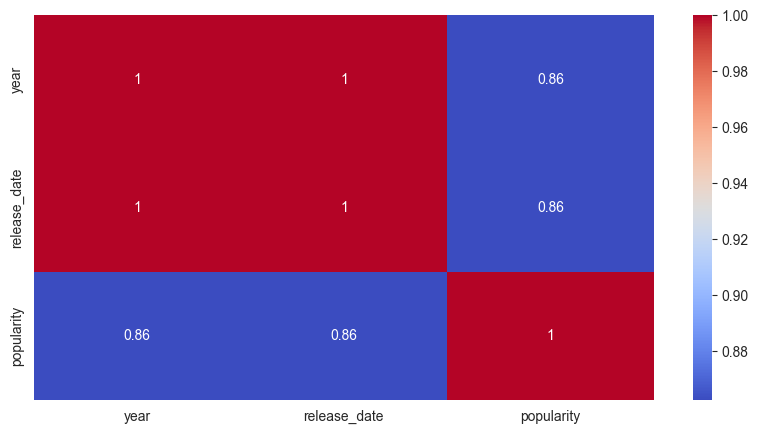

In [13]:
sns.heatmap(df_date.corr(), annot=True, cmap='coolwarm')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

As we can see column `release_date` contains more complete data than `year`, but correlation between `popularity` and `release_date` the same as for `popularity` and `year`, so we can can leave simpler so interpretation column `year`

In [14]:
df.drop(['year_date', 'release_date'], axis=1, inplace=True)

In [15]:
df.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  [Sergei Rachmaninoff, James Levine, Berliner P...         0.279   
1                                       [Dennis Day]         0.819   
2  [KHP Kridhamardawa Karaton Ngayogyakarta Hadin...         0.328   
3                                     [Frank Parker]         0.275   
4                                       [Phil Regan]         0.418   

   duration_ms  energy  explicit  instrumentalness  key  liveness  loudness  \
0       831667   0.211         0          0.878000   10     0.665   -20.096   
1       180533   0.341         0          0.000000    7     0.160   -12.441   
2       500062   0.166         0          0.913000    3     0.101   -14.850   
3       210000   0.309         0          0.000028    5     0.381    -9.316   
4       166693   0.193         0          0.000002    3     0.229   -10.096   

   mode                                               name  popularity  \
0     1  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4   
1     1                            Clancy Lowered the Boom           5   
2     1                                          Gati Bali           5   
3     1                                          Danny Boy           3   
4     1                        When Irish Eyes Are Smiling           2   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

# Feature Engineering

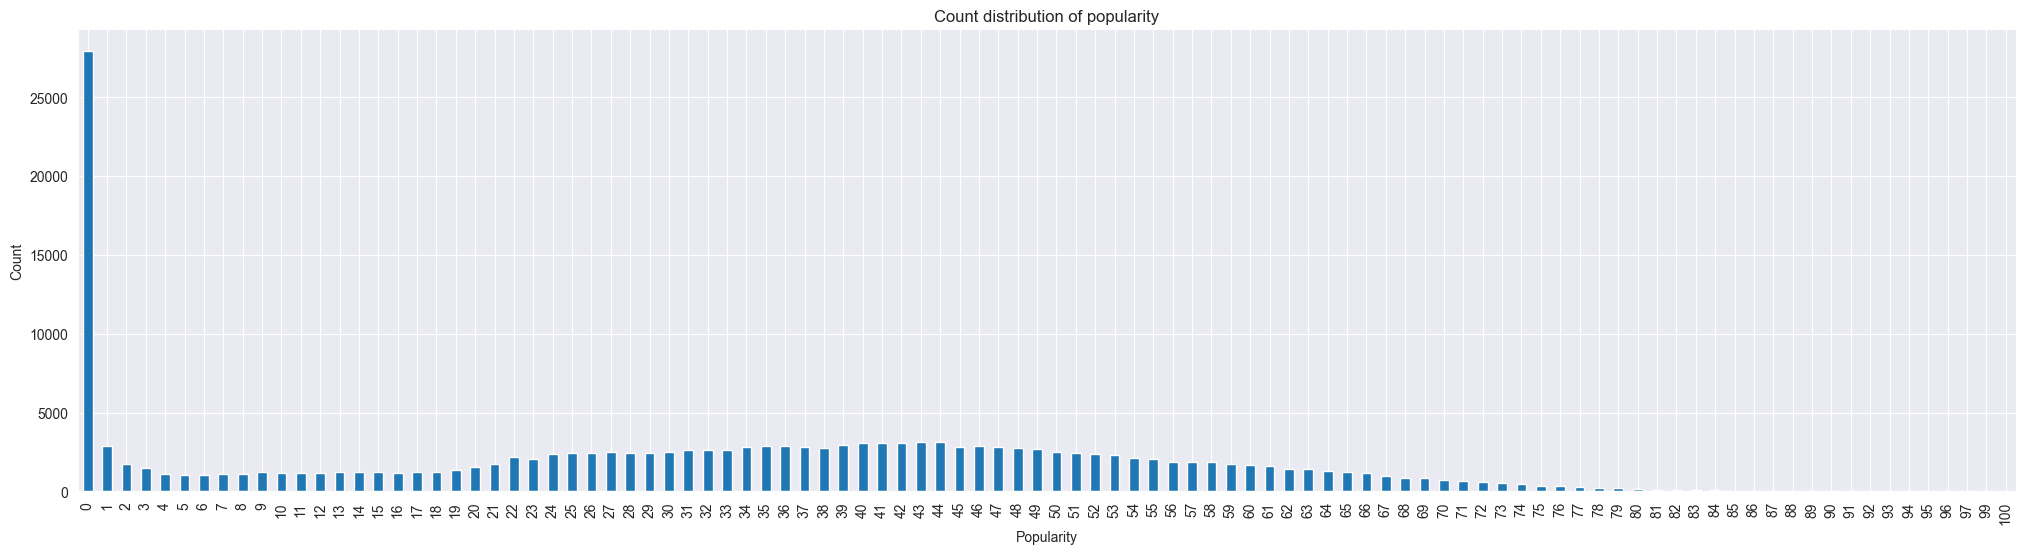

In [16]:
plot_df = df['popularity'].value_counts()[sorted(df.popularity.unique())]
# Option 1: Bar Plot
plot_df.plot.bar(figsize=(25, 6))

# Customization
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title(f'Count distribution of popularity')
plt.show()

In [17]:
more_then_80 = df[df['popularity'] > 80]

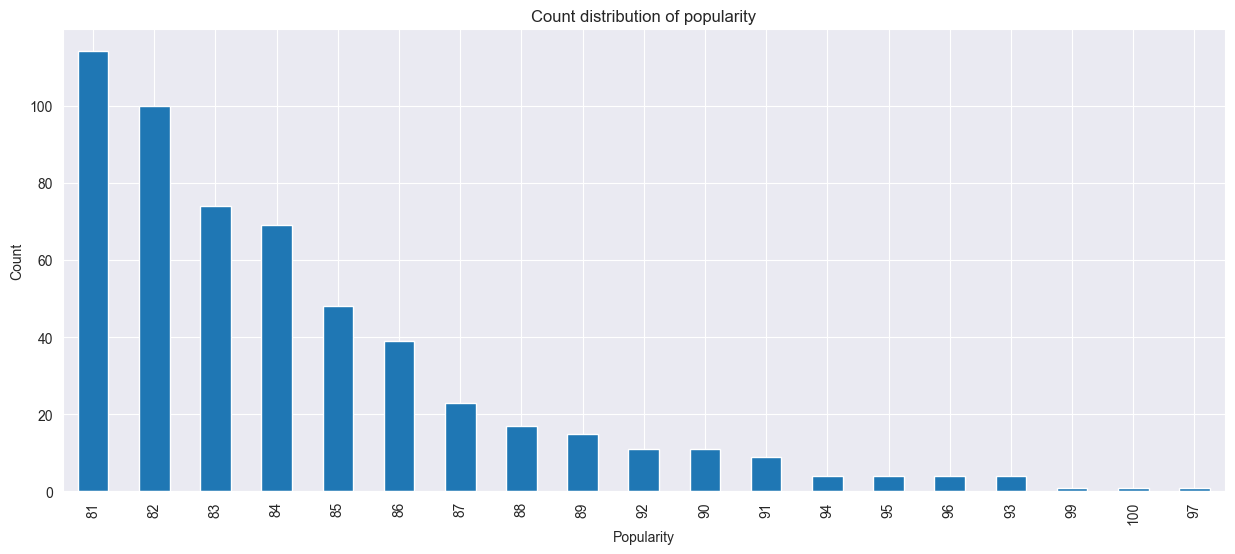

In [18]:
plot_df = more_then_80['popularity'].value_counts()
# Option 1: Bar Plot
plot_df.plot.bar(figsize=(15, 6))

# Customization
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title(f'Count distribution of popularity')
plt.show()

In [19]:
len(more_then_80) / len(df) * 100

 0.3217

In [20]:
df['top_30'] = df['popularity'] > 70
df['top_20'] = df['popularity'] > 80
df['top_10'] = df['popularity'] > 90

Thus, we see that most of the songs are not gaining popularity, and only 0.3217 percent of all songs fall into the top 20

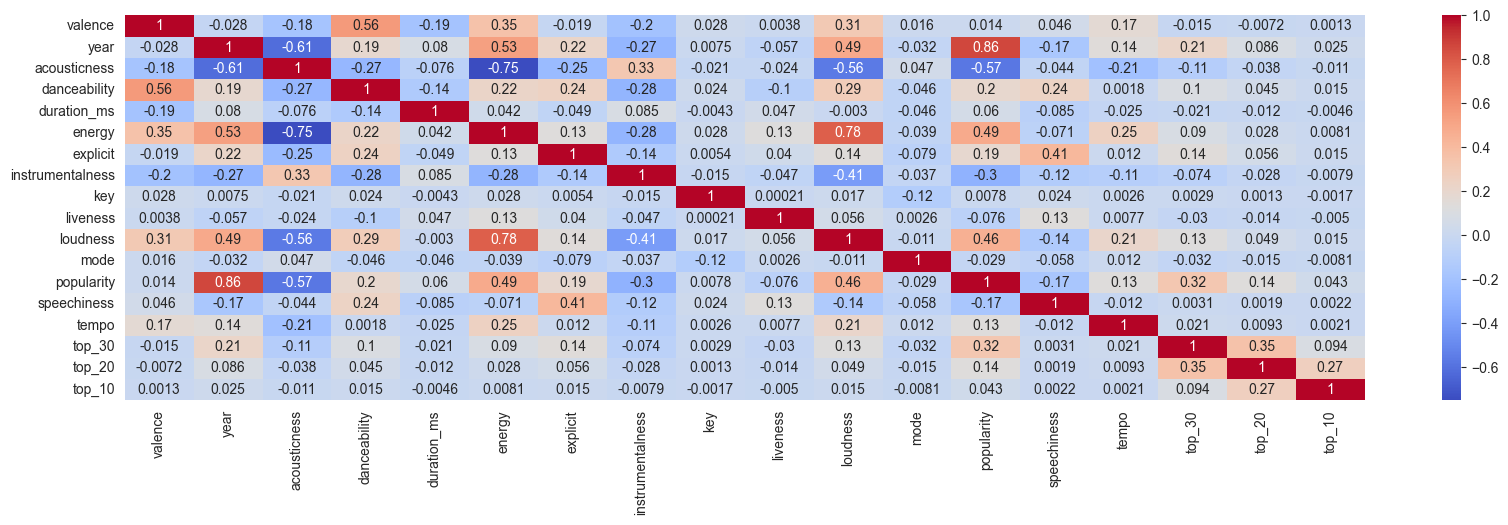

In [21]:
sns.heatmap(df.drop(['artists', 'name'], axis=1).corr(), annot=True, cmap='coolwarm')
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()

This plot shows the correlation between pairs of variables.

Let's focus the attention on the target value - popularity.

We can see that popularity is `strongly correlated with year`, a little bit less with `energy, loudness`, while it is weakly correlated with `danceability, instrumentalness and explicit`, and negatively correlated with `acousticness`.

Now let's check all of them separately

### Year

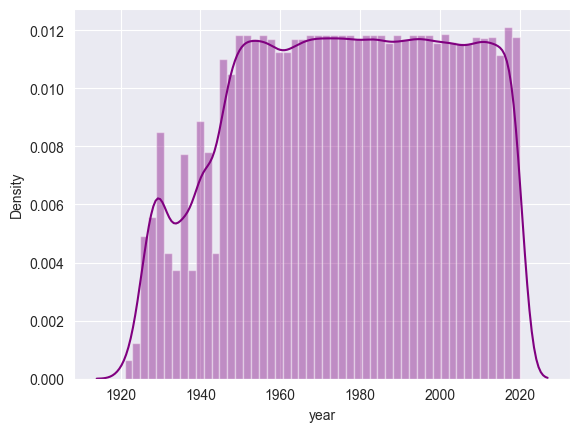

In [22]:
sns.distplot(df.year, color='purple')
plt.show()

#### Count of songs presented per year

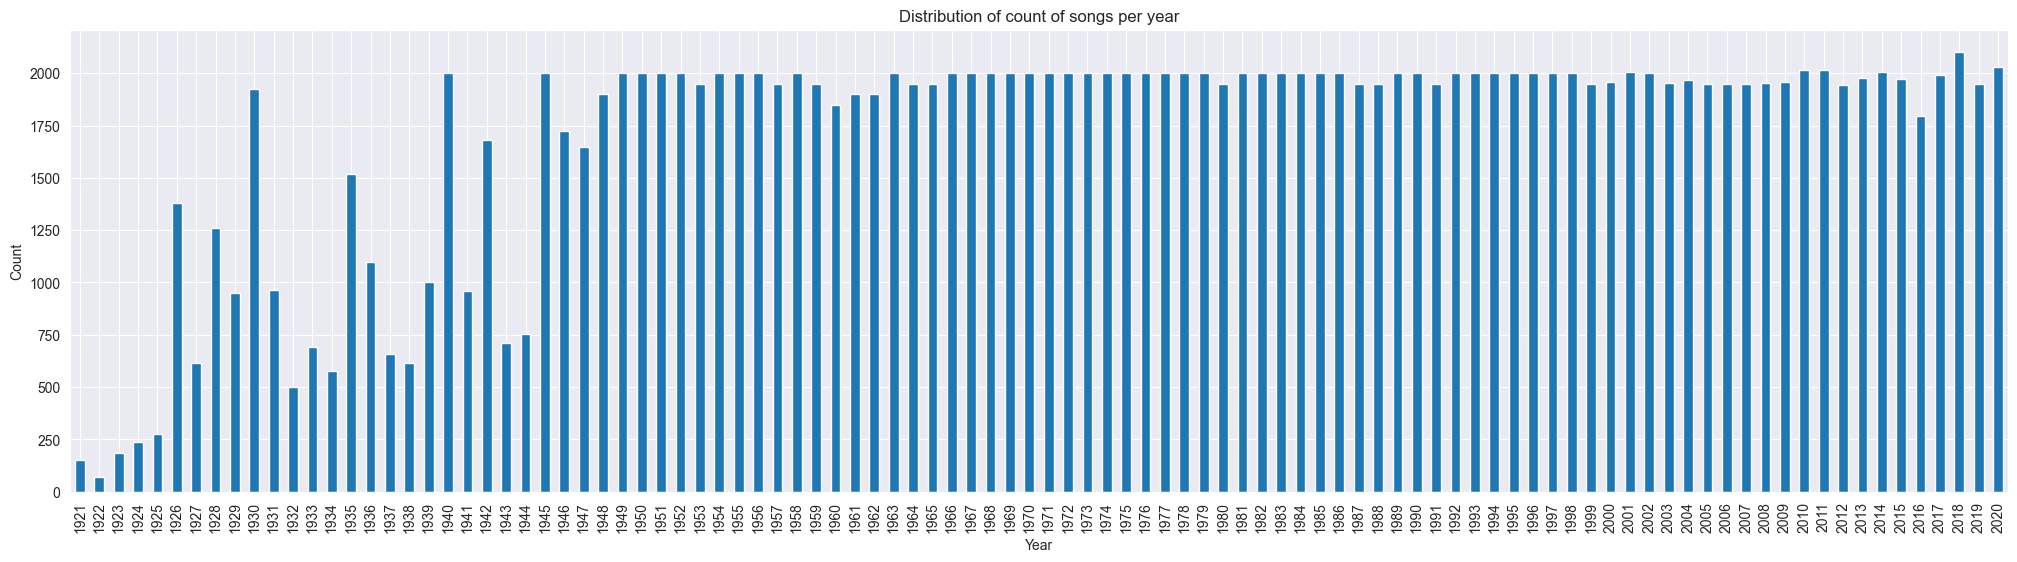

In [23]:
plot_df = df['year'].value_counts()[df.year.unique()]
# Option 1: Bar Plot
plot_df.plot.bar(figsize=(25, 6))

# Customization
plt.xlabel('Year')
plt.ylabel('Count')
plt.title(f'Distribution of count of songs per year')
plt.show()

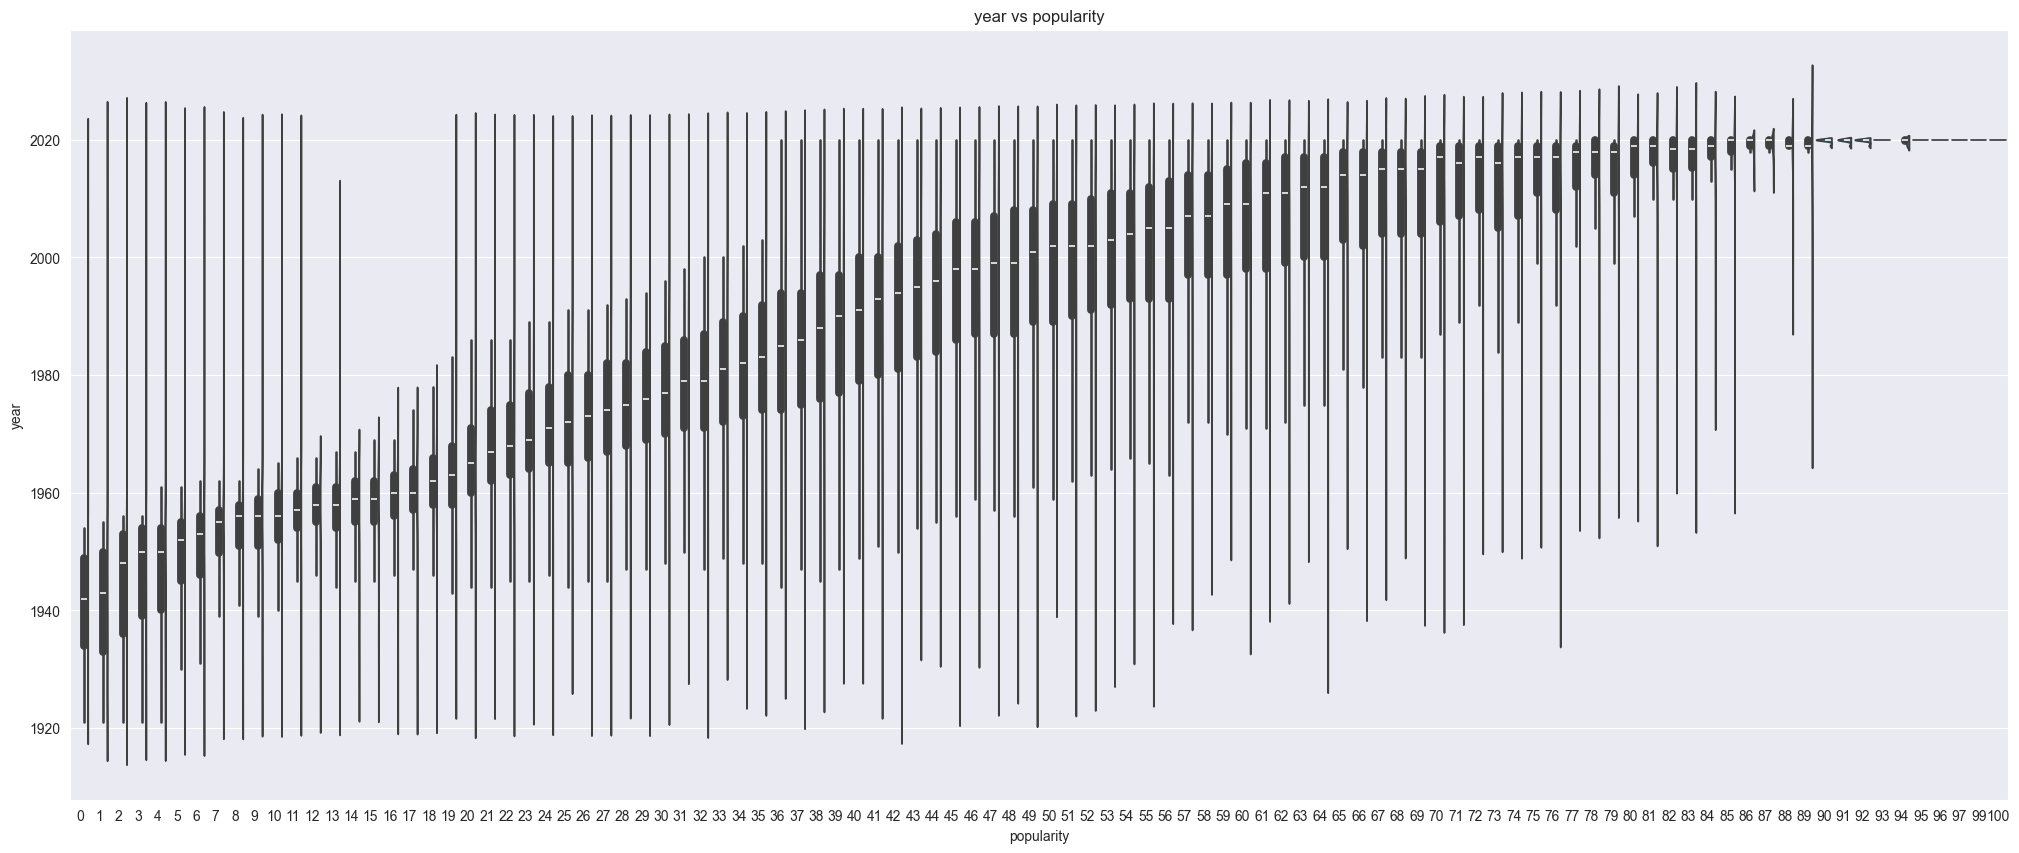

In [24]:
_, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.violinplot(x="popularity", y="year", data=df, split=True, ax=ax)
ax.set_title('year vs popularity')
plt.show()

In [25]:
min(df[df['top_10']]['year'])

2019

We can say that, the release year of the song is strongly correlated with the popularity. It looks like people listen to new tracks more than old "classics". Moreover, top-10 song released only after 2019

#### Energy

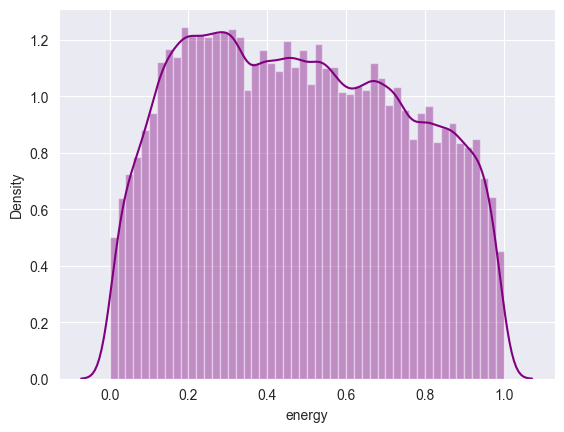

In [26]:
sns.distplot(df.energy, color='purple')
plt.show()

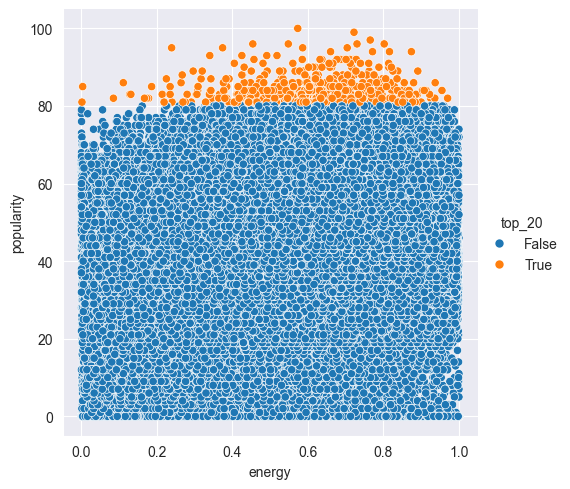

In [27]:
sns.relplot(data=df, x='energy', y='popularity', hue="top_20")

Regarding the correlation with energy we can say that, in general, energy could be affected by popularity, as we can see on the plot that we do not have a strong correlation but this could be the starter point of an future research (as we can see later on).

#### Loudness

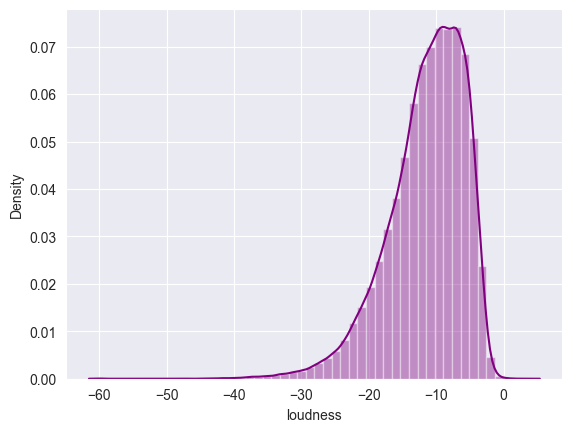

In [28]:
sns.distplot(df.loudness, color='purple')
plt.show()

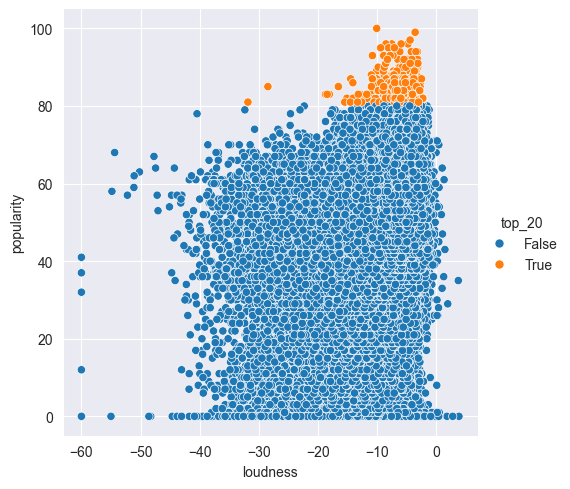

In [29]:
sns.relplot(data=df, x='loudness', y='popularity', hue="top_20")

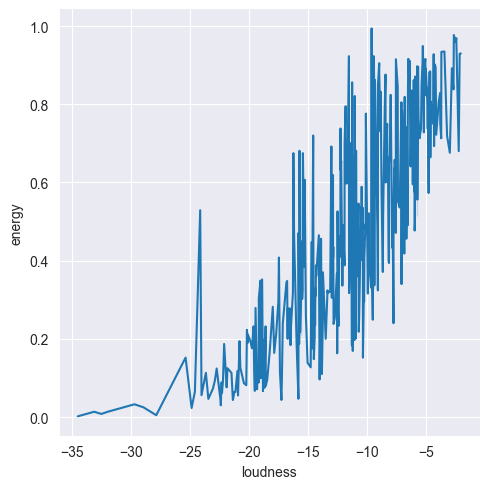

In [30]:
sns.relplot(data=df[::500], x="loudness", y="energy", kind="line", errorbar="sd", )

We can notice that the correlation between popularity and loudness and between popularity and energy is very similar. This can be due to the fact that the correlation between energy and loudness is high. For that reason we can state that, as we could expected, the louder a song is, the more energetic it is.

#### Acousticness

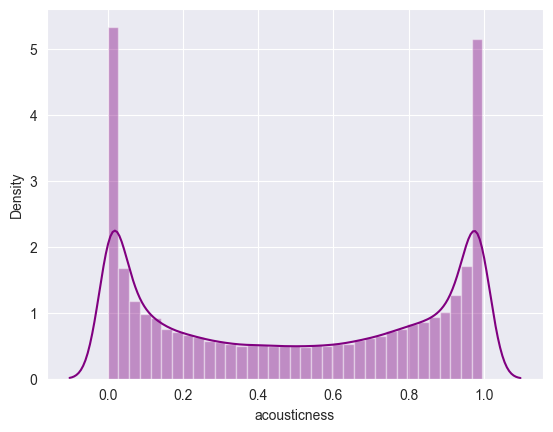

In [31]:
sns.distplot(df.acousticness, color='purple')
plt.show()

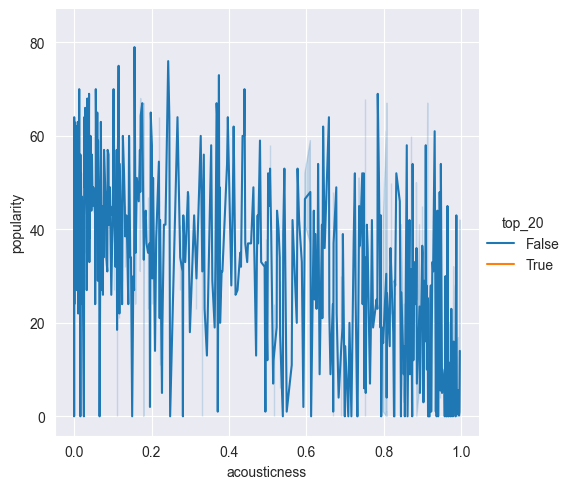

In [32]:
sns.relplot(data=df[::300], x='acousticness', y='popularity', hue="top_20", kind='line')

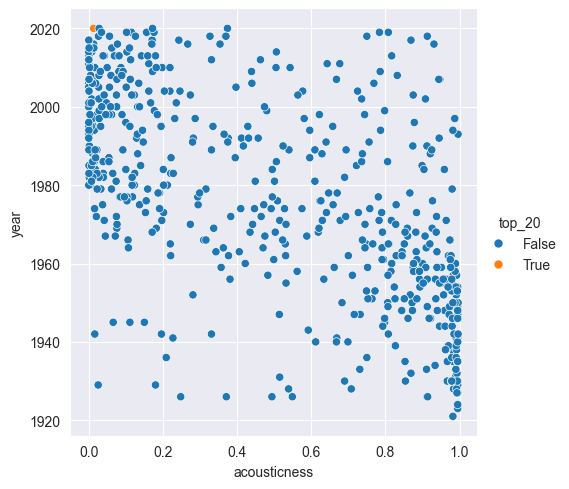

In [33]:
sns.relplot(data=df[::300], x='acousticness', y='year', hue='top_20')

There is a negative correlation between acousticness and popularity too. We can guess older tracks have more acousticness than the new ones because the less acoustic a song is, the more popular it is.

#### Instrumentalness

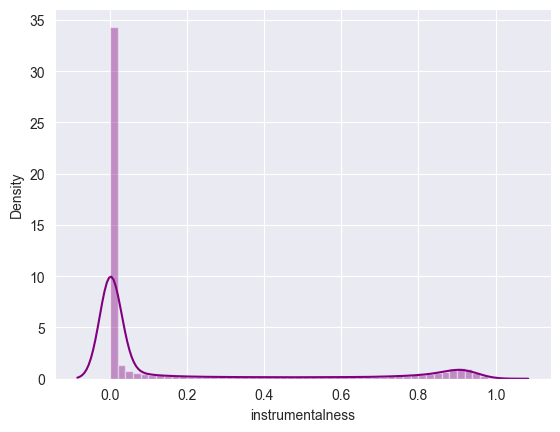

In [34]:
sns.distplot(df.instrumentalness, color='purple')
plt.show()

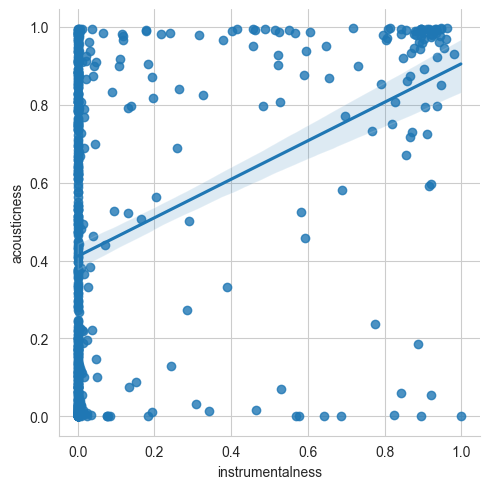

In [35]:
sns.set_style('whitegrid')
sns.lmplot(x='instrumentalness', y='acousticness', data=df[::300])

<Axes: xlabel='instrumentalness', ylabel='popularity'>

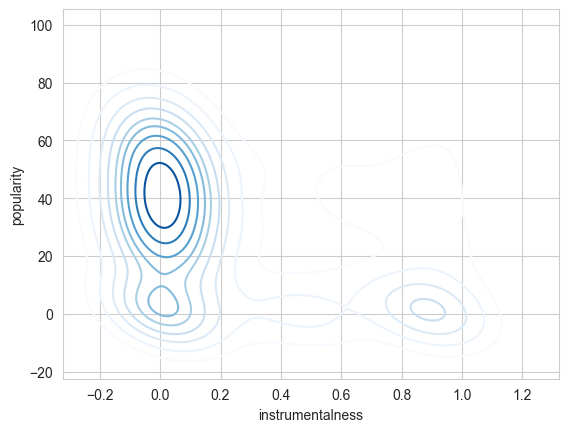

In [36]:
sns.kdeplot(x='instrumentalness', y='popularity', data=df[::300], cmap='Blues')

We have a weakly negative correlation between popularity and instrumentalness. This might mean that people would rather listening tracks with singing voices. But the correlation is not really strong, so this should be better investigate with a deeper analysis.

Usually songs with high acousticness have also an higher level of instrumental (because they are positive correlated), in fact as we can see on the plot, we have a weak negative correlation between popularity and instrumental and this follow our theory. As we mentioned, new tracks are more popular than older ones (correlation between year and popularity).

#### Danceability

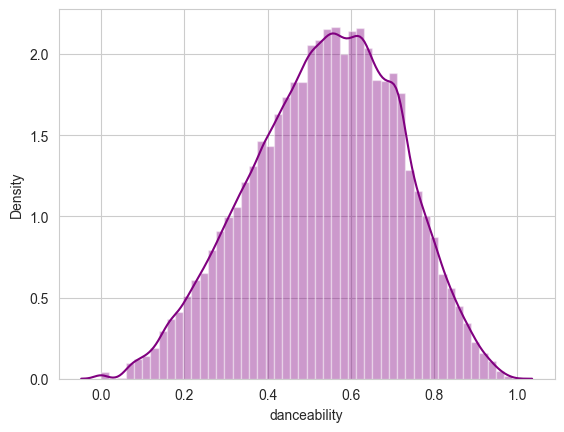

In [37]:
sns.distplot(df.danceability, color='purple')
plt.show()

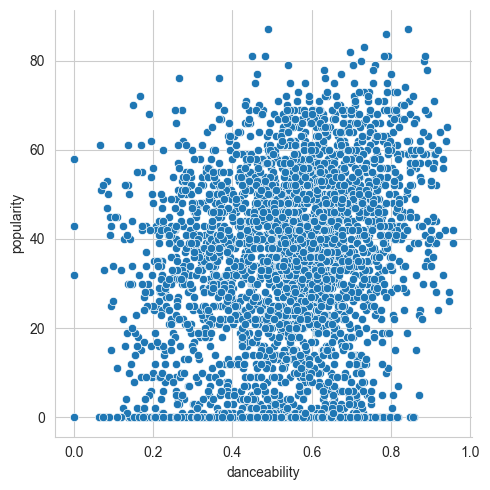

In [38]:
sns.relplot(data=df[::50], x='danceability', y='popularity')

As you can see on the graph, there is no particularly strong relationship between danceability and popularity.

#### Explicit

<Axes: xlabel='explicit', ylabel='popularity'>

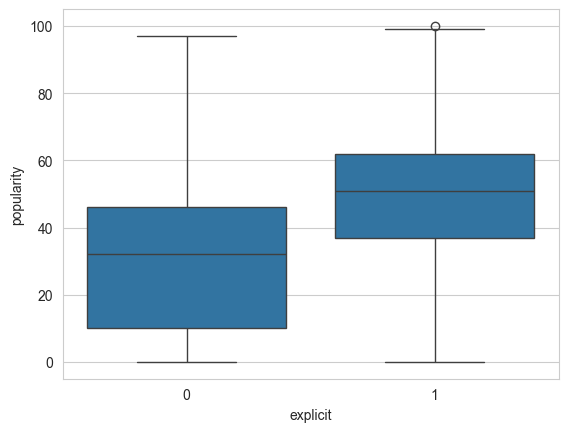

In [39]:
sns.boxplot(x='explicit', y='popularity', data=df)

As we can see songs with `explicit == 1` have higher popularity. So it can have big affect into song's popularity 

#### Artists

In [40]:
def get_best_artists(df):
    return set(df[df['top_30']]['artists'].explode().unique())


best_artists = get_best_artists(df)
best_artists

{'Tierra Whack',
 'Jonathan Groff',
 'BloodPop®',
 'Roscoe Dash',
 'Matthew Wilder',
 'Rachel Platten',
 'System Of A Down',
 'Gaby Moreno',
 'salvia palth',
 'Bastille',
 'Sam Tinnesz',
 'ILOVEMAKONNEN',
 'Tove Lo',
 'Sam Feldt',
 'Liz Gillies',
 'Aiko',
 'JVLA',
 'Xzibit',
 'Chord Overstreet',
 'Freya Ridings',
 'Guy Sebastian',
 'Phillipa Soo',
 'Thutmose',
 'Billy Joel',
 'Young Nudy',
 'Kevin Roldan',
 'Bowling For Soup',
 'Carly Rae Jepsen',
 'Lil Tjay',
 'Christian Nodal',
 'Morgan Wallen',
 'Paul Simon',
 'Night Lovell',
 'Fall Out Boy',
 'Gladys Knight & The Pips',
 'Conan Gray',
 'Vedo',
 'Survivor',
 'Franco De Vita',
 'Alannah Myles',
 'Nicky Jam',
 'Captain Cuts',
 'Luther Vandross',
 'Sasha Sloan',
 'Verzache',
 'Bob Seger',
 'Halsey',
 'Afroman',
 'Mrs. GREEN APPLE',
 'James Blake',
 'Sum 41',
 'Creedence Clearwater Revival',
 'Korn',
 'White Gold',
 'Chris Martin',
 'Vula',
 'Iggy Pop',
 'HIXTAPE',
 'Jax Jones',
 'Bronski Beat',
 'Krono',
 'Benny Sings',
 'Gigamesh',
 '

In [41]:
# Logic
def add_is_have_best_artist_column(df, best_artists):
    df['is_have_best_artist'] = df['artists'].apply(lambda x: len(set(x) & best_artists) > 0)
    return df

In [42]:
df = add_is_have_best_artist_column(df.copy(), best_artists)

In [43]:
df.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  [Sergei Rachmaninoff, James Levine, Berliner P...         0.279   
1                                       [Dennis Day]         0.819   
2  [KHP Kridhamardawa Karaton Ngayogyakarta Hadin...         0.328   
3                                     [Frank Parker]         0.275   
4                                       [Phil Regan]         0.418   

   duration_ms  energy  explicit  instrumentalness  key  ...  loudness  mode  \
0       831667   0.211         0          0.878000   10  ...   -20.096     1   
1       180533   0.341         0          0.000000    7  ...   -12.441     1   
2       500062   0.166         0          0.913000    3  ...   -14.850     1   
3       210000   0.309         0          0.000028    5  ...    -9.316     1   
4       166693   0.193         0          0.000002    3  ...   -10.096     1   

                                                name popularity  speechiness  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...          4       0.0366   
1                            Clancy Lowered the Boom          5       0.4150   
2                                          Gati Bali          5       0.0339   
3                                          Danny Boy          3       0.0354   
4                        When Irish Eyes Are Smiling          2       0.0380   

     tempo  top_30  top_20  top_10  is_have_best_artist  
0   80.954   False   False   False                False  
1   60.936   False   False   False                False  
2  110.339   False   False   False                False  
3  100.109   False   False   False                False  
4  101.665   False   False   False                False  

[5 rows x 21 columns]

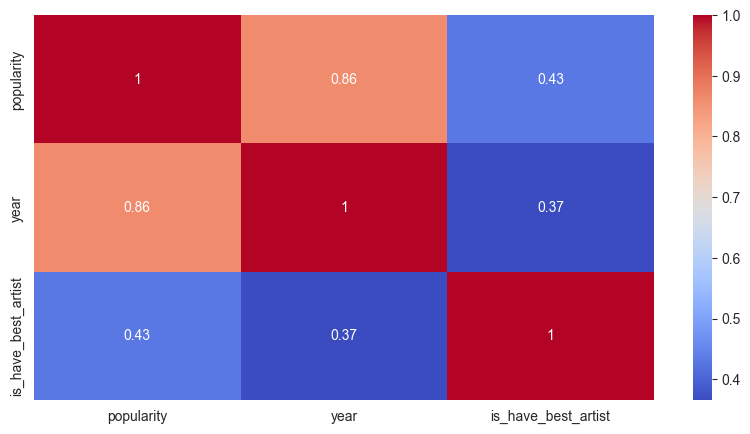

In [44]:
sns.heatmap(df[['popularity', 'year', 'is_have_best_artist']].corr(), annot=True, cmap='coolwarm')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [45]:
df.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  [Sergei Rachmaninoff, James Levine, Berliner P...         0.279   
1                                       [Dennis Day]         0.819   
2  [KHP Kridhamardawa Karaton Ngayogyakarta Hadin...         0.328   
3                                     [Frank Parker]         0.275   
4                                       [Phil Regan]         0.418   

   duration_ms  energy  explicit  instrumentalness  key  ...  loudness  mode  \
0       831667   0.211         0          0.878000   10  ...   -20.096     1   
1       180533   0.341         0          0.000000    7  ...   -12.441     1   
2       500062   0.166         0          0.913000    3  ...   -14.850     1   
3       210000   0.309         0          0.000028    5  ...    -9.316     1   
4       166693   0.193         0          0.000002    3  ...   -10.096     1   

                                                name popularity  speechiness  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...          4       0.0366   
1                            Clancy Lowered the Boom          5       0.4150   
2                                          Gati Bali          5       0.0339   
3                                          Danny Boy          3       0.0354   
4                        When Irish Eyes Are Smiling          2       0.0380   

     tempo  top_30  top_20  top_10  is_have_best_artist  
0   80.954   False   False   False                False  
1   60.936   False   False   False                False  
2  110.339   False   False   False                False  
3  100.109   False   False   False                False  
4  101.665   False   False   False                False  

[5 rows x 21 columns]

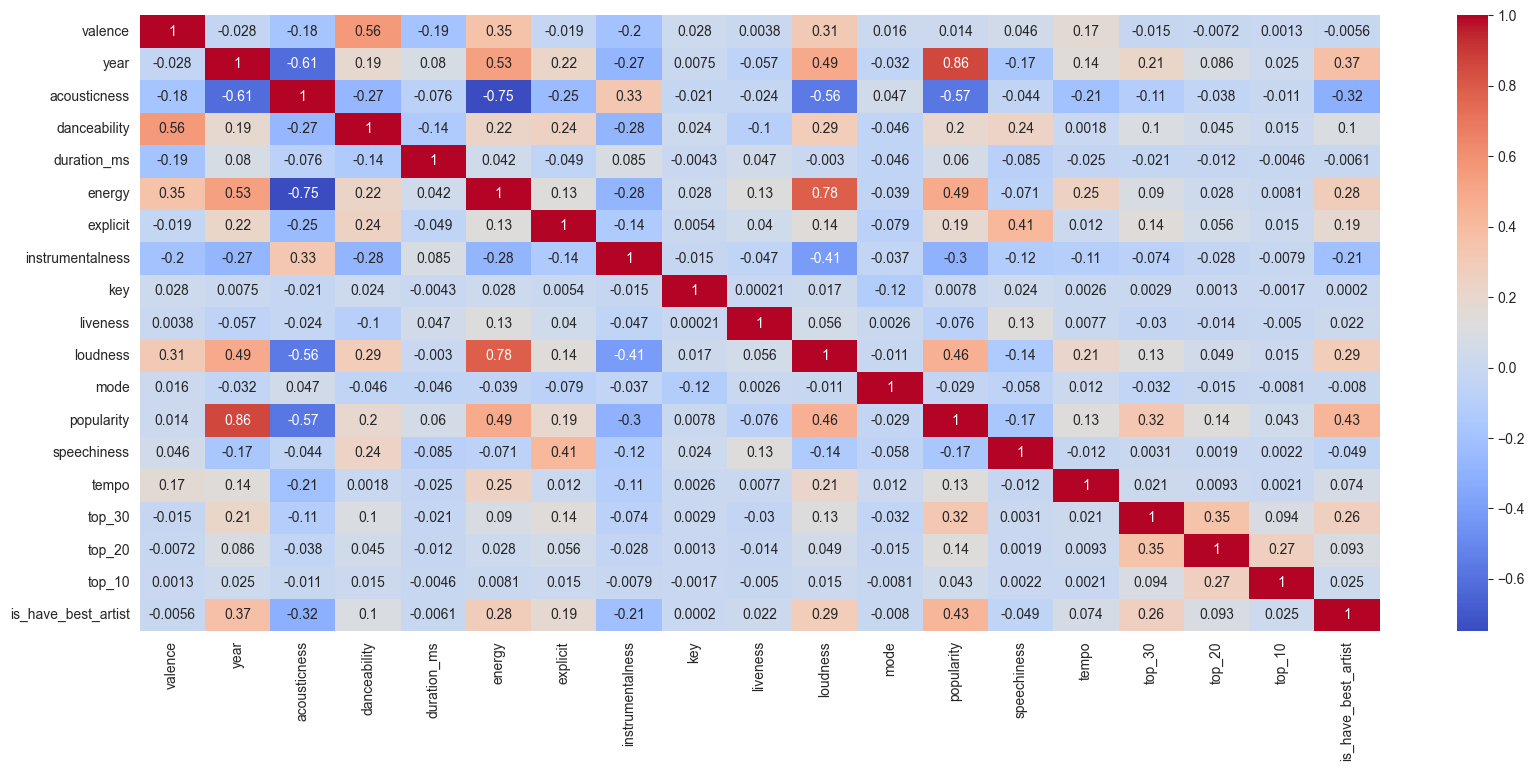

In [46]:
sns.heatmap(df.drop(['artists', 'name'], axis=1).corr(), annot=True, cmap='coolwarm')
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.show()

<Axes: xlabel='is_have_best_artist', ylabel='popularity'>

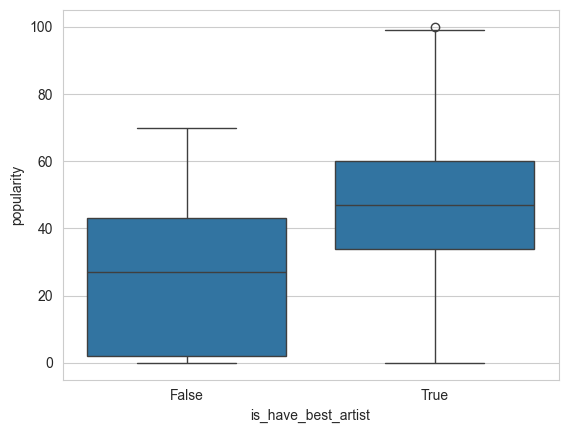

In [47]:
sns.boxplot(x='is_have_best_artist', y='popularity', data=df)

As we can see, a column `is_have_best_artist` also helps to better distinguish whether a song will be popular or not.

#### Song name

In [48]:
def has_special_chars(text):
    import re
    return bool(re.search(r"[^\w\s]", text))


df['name_length'] = df['name'].str.len()
df['num_words'] = df['name'].str.split().str.len()
df['is_uppercase'] = df['name'].str.isupper().astype(int)
df['has_special_chars'] = df['name'].apply(has_special_chars).astype(int)

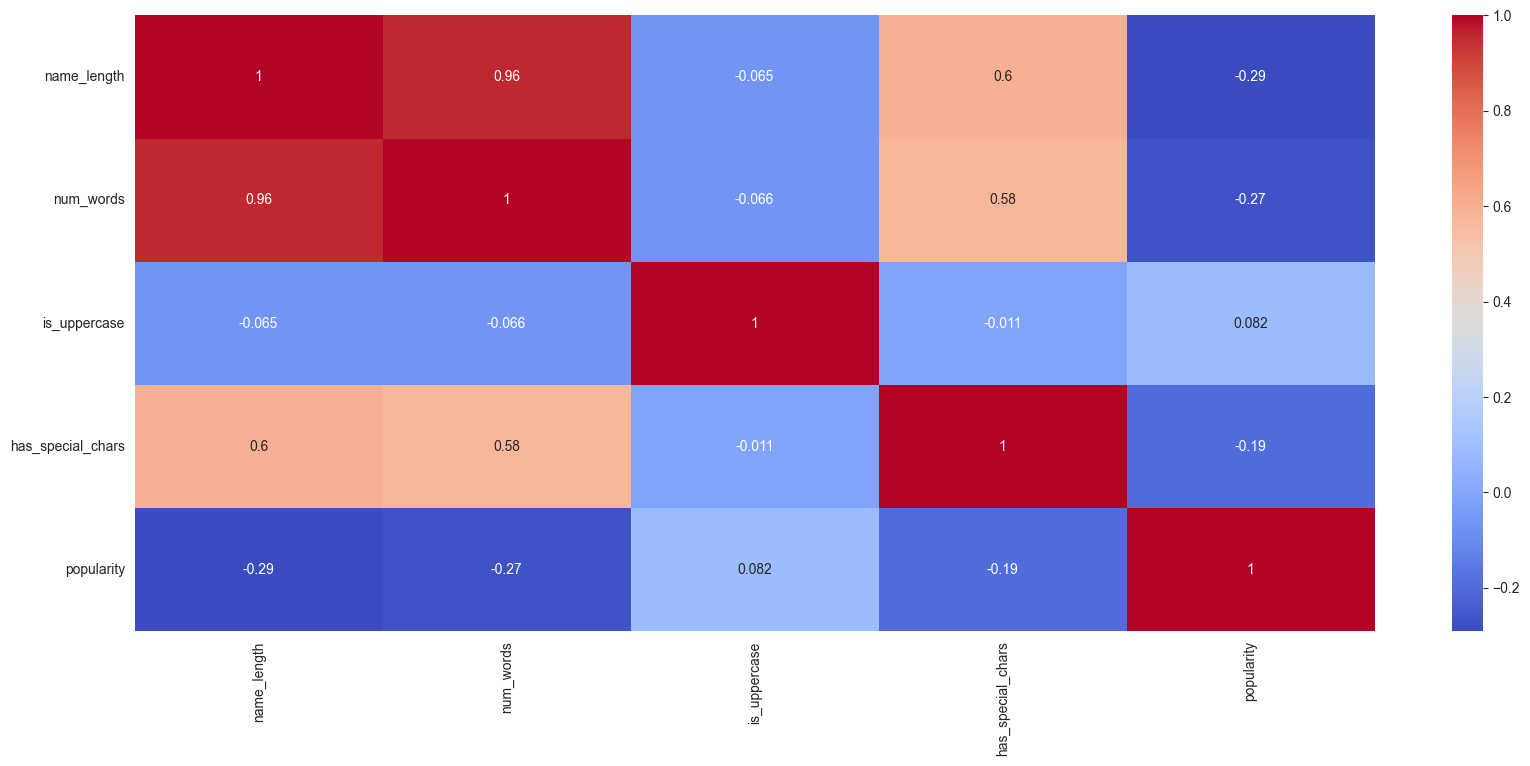

In [49]:
sns.heatmap(
    df[['name_length', 'num_words', 'is_uppercase', 'has_special_chars', 'popularity']].corr(),
    annot=True,
    cmap='coolwarm'
)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.show()

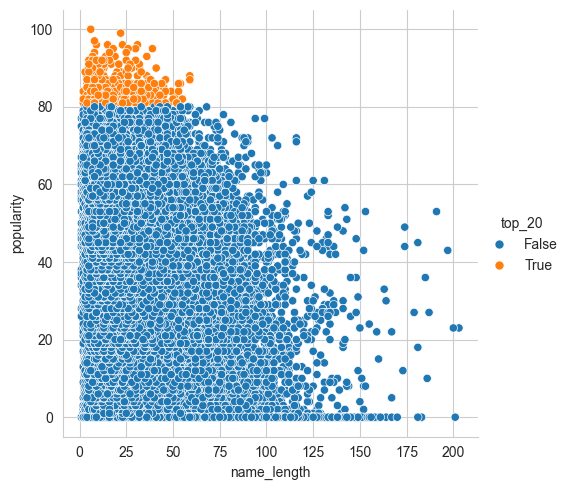

In [50]:
sns.relplot(data=df[::], x='name_length', y='popularity', hue='top_20')

<Axes: xlabel='top_20', ylabel='name_length'>

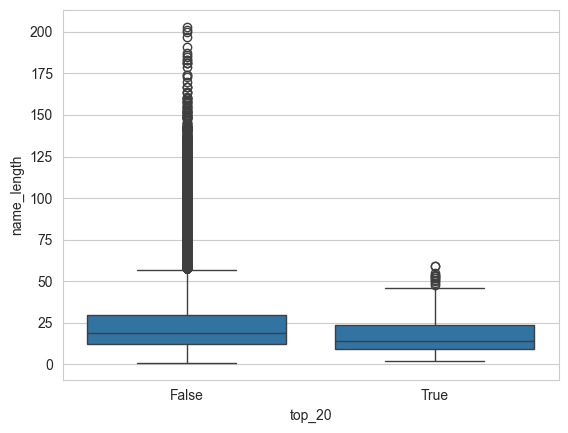

In [51]:
sns.boxplot(x='top_20', y='name_length', data=df)

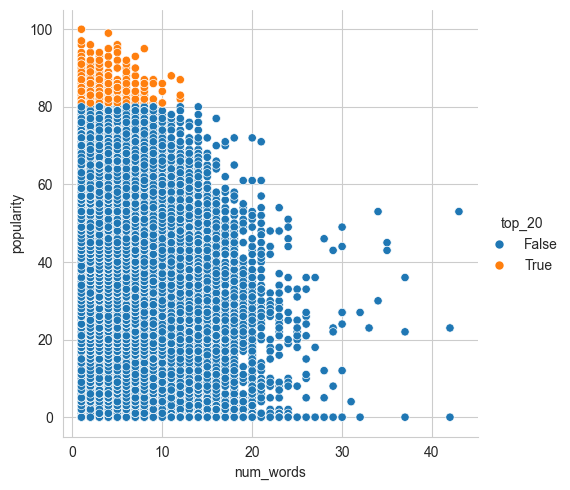

In [52]:
sns.relplot(data=df, x='num_words', y='popularity', hue='top_20')

<Axes: xlabel='top_20', ylabel='num_words'>

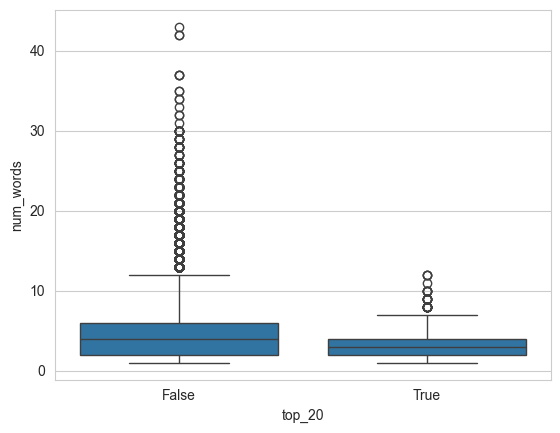

In [53]:
sns.boxplot(x='top_20', y='num_words', data=df)

<Axes: xlabel='has_special_chars', ylabel='popularity'>

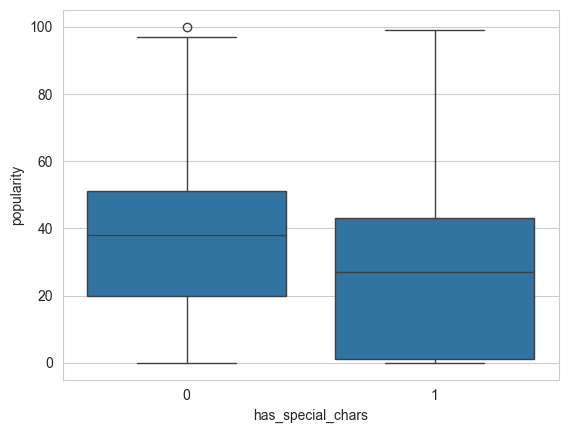

In [54]:
sns.boxplot(x='has_special_chars', y='popularity', data=df)

From the observations above, we can see that the smaller and simpler the name, the more popular the song. Most likely, this is due to the fact that it is easier to find and listen to it to a new listener who does not have it in his audio recordings.

So we can add two new feature `name_length` and `has_special_chars`, because `is_uppercase` has low corr with `popularity` while `name_length` and `num_words` have high corr among themselves

#### Conclusion

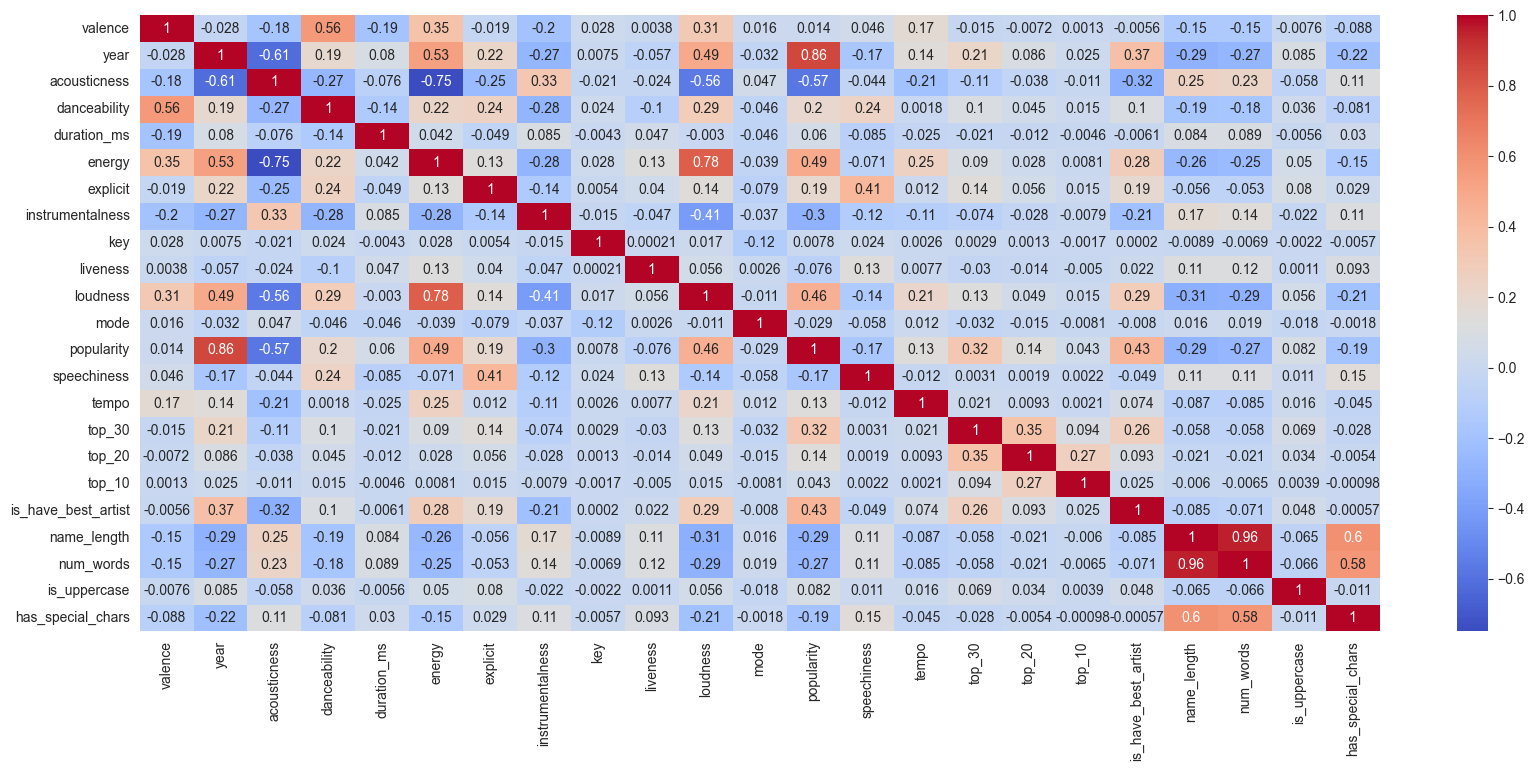

In [55]:
sns.heatmap(df.drop(['artists', 'name'], axis=1).corr(), annot=True, cmap='coolwarm')
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.show()

In [56]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'speechiness',
       'tempo', 'top_30', 'top_20', 'top_10', 'is_have_best_artist',
       'name_length', 'num_words', 'is_uppercase', 'has_special_chars'],
      dtype='object')

In [57]:
import re
import ast
import pandas as pd
from sklearn.model_selection import train_test_split


def preprocess_data(df, best_artists):
    del_cols = ['id', 'release_date', 'valence', 'artists', 'duration_ms', 'key', 'liveness', 'loudness', 'mode',
                'name']

    df['artists'] = df['artists'].apply(lambda x: ast.literal_eval(x))
    if best_artists is None:
        top_30_songs = df[df['popularity'] > 70]
        best_artists = set(top_30_songs['artists'].explode().unique())
        del_cols += ['popularity']

    df['is_have_best_artist'] = df['artists'].apply(lambda x: len(set(x) & best_artists) > 0)
    df['name_length'] = df['name'].str.len()
    df['has_special_chars'] = df['name'].apply(lambda x: bool(re.search(r"[^\w\s]", x))).astype(int)
    df.drop(del_cols, axis=1, inplace=True)
    return df, best_artists


df = pd.read_csv('../../data/spotify/spotify_dataset.csv')

X, Y = df.drop(['popularity'], axis=1), df['popularity']
train, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)

train['popularity'] = train_Y
train_X, best_artists = preprocess_data(train, None)
test_X, _ = preprocess_data(test_X, best_artists)

In [58]:
# train_X, train_Y = train_X[::5], train_Y[::5] # Technical constraint <- too much time for full dataset

# Ensembles

## Imports

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

%precision % .4f

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from hw.task1.bagging_realization import MyBaggingRegressor
from hw.task1.ada_boosting_realization import MyAdaBoostRegressor

## Init

In [60]:
df = pd.DataFrame(
    columns=['ensemble_name', 'r2_score', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error',
             'training_time'])

In [61]:
from datetime import datetime


def estimate_model(name, model, grid: GridSearchCV, train_X, train_Y, test_X, test_Y, df):
    res = {'ensemble_name': name}

    grid.fit(train_X, train_Y)
    best_params = grid.best_params_

    start_time = datetime.now()
    model = model.set_params(**best_params)
    model.fit(train_X, train_Y)
    end_time = datetime.now()
    res['training_time'] = end_time - start_time
    # model = grid.best_estimator_

    y_pred = model.predict(test_X)
    res['r2_score'] = r2_score(test_Y, y_pred)
    res['mean_squared_error'] = mean_squared_error(test_Y, y_pred)
    res['mean_absolute_error'] = mean_absolute_error(test_Y, y_pred)
    res['mean_absolute_percentage_error'] = mean_absolute_percentage_error(test_Y, y_pred)

    df = pd.concat([df, pd.DataFrame(res, index=[0])])
    return grid, model, df

## Bagging

### My Realization Bagging

In [62]:
from sklearn.model_selection import StratifiedKFold

random_state = 0

param_grid = {
    'n_estimators': [50, 100, 200],
    'base_estimator__max_depth': [2, 4, 8],
    # 'base_estimator__max_features': [2, 4, 8, len(train_X.columns)],
    'base_estimator__criterion': ["squared_error", "friedman_mse", "poisson"],
    # 'base_estimator__splitter': ["best", "random"],
    'base_estimator__min_samples_split': [4, 8, 16, 32],
    'base_estimator__min_samples_leaf': [4, 8, 16, 32],
    'base_estimator__random_state': [random_state],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_state)

bagging_dt = MyBaggingRegressor(random_state=random_state)

my_bagging_grid_model = GridSearchCV(estimator=bagging_dt, cv=cv,
                                     param_grid=param_grid,
                                     scoring='r2',
                                     refit=True,
                                     n_jobs=-1,
                                     verbose=1)

In [63]:
my_bagging_grid, my_bagging_model, df = estimate_model('MyBaggingRegressor',
                                                       bagging_dt,
                                                       my_bagging_grid_model,
                                                       train_X,
                                                       train_Y,
                                                       test_X, test_Y, df)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


In [64]:
print("best param: ", my_bagging_grid.best_params_)

best param:  {'base_estimator__criterion': 'poisson', 'base_estimator__max_depth': 8, 'base_estimator__min_samples_leaf': 32, 'base_estimator__min_samples_split': 4, 'base_estimator__random_state': 0, 'n_estimators': 50}


In [65]:
df

ensemble_name  r2_score  mean_squared_error  mean_absolute_error  \
0  MyBaggingRegressor  0.802652           94.434333             6.842835   

   mean_absolute_percentage_error          training_time  
0                    2.025815e+15 0 days 00:00:23.717813

### Sklearn Bagging

In [66]:
from sklearn.model_selection import StratifiedKFold

random_state = 0

param_grid = {
    'n_estimators': [50, 100, 200],
    'estimator__max_depth': [2, 5, 10],
    # 'estimator__max_features': [2, 4, 8, len(train_X.columns)],
    'estimator__criterion': ["squared_error", "friedman_mse", "poisson"],
    # 'estimator__splitter': ["best", "random"],
    'estimator__min_samples_split': [4, 8, 16, 32],
    'estimator__min_samples_leaf': [4, 8, 16, 32],
    'estimator__random_state': [random_state],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_state)

sklearn_bagging = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=random_state))

sklearn_bagging_grid_bdt = GridSearchCV(estimator=sklearn_bagging, cv=cv,
                                        param_grid=param_grid,
                                        scoring='r2',
                                        refit=True,
                                        n_jobs=-1,
                                        verbose=2)

In [67]:
sklearn_bagging_grid, sklearn_bagging_model, df = estimate_model('SklearnBaggingRegressor',
                                                                 sklearn_bagging,
                                                                 sklearn_bagging_grid_bdt,
                                                                 train_X,
                                                                 train_Y,
                                                                 test_X,
                                                                 test_Y,
                                                                 df
                                                                 )

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


In [68]:
print("best param: ", sklearn_bagging_grid.best_params_)

best param:  {'estimator__criterion': 'squared_error', 'estimator__max_depth': 10, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 4, 'estimator__random_state': 0, 'n_estimators': 200}


In [69]:
df

ensemble_name  r2_score  mean_squared_error  mean_absolute_error  \
0       MyBaggingRegressor  0.802652           94.434333             6.842835   
0  SklearnBaggingRegressor  0.815382           88.342971             6.642715   

   mean_absolute_percentage_error          training_time  
0                    2.025815e+15 0 days 00:00:23.717813  
0                    1.859987e+15 0 days 00:01:14.034918

### Random Forest

In [70]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor

random_state = 0

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 8],
    # 'max_features': [2, 4, 8, len(train_X.columns)],
    'criterion': ["squared_error", "friedman_mse", "poisson"],
    'min_samples_split': [4, 8, 16, 32],
    'min_samples_leaf': [4, 8, 16, 32],  # 8, 10, 12
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_state)

random_forest_dt = RandomForestRegressor(random_state=random_state)

random_forest_grid_model = GridSearchCV(estimator=random_forest_dt, cv=cv,
                                        param_grid=param_grid,
                                        scoring='r2',
                                        refit=True,
                                        n_jobs=-1,
                                        verbose=2)

In [71]:
random_forest_grid, random_forest_model, df = estimate_model('RandomForestRegressor',
                                                             random_forest_dt,
                                                             random_forest_grid_model,
                                                             train_X,
                                                             train_Y,
                                                             test_X,
                                                             test_Y,
                                                             df
                                                             )

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


In [72]:
print("best param: ", random_forest_grid.best_params_)

best param:  {'criterion': 'squared_error', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 200}


In [73]:
df

ensemble_name  r2_score  mean_squared_error  mean_absolute_error  \
0       MyBaggingRegressor  0.802652           94.434333             6.842835   
0  SklearnBaggingRegressor  0.815382           88.342971             6.642715   
0    RandomForestRegressor  0.810765           90.552133             6.742787   

   mean_absolute_percentage_error          training_time  
0                    2.025815e+15 0 days 00:00:23.717813  
0                    1.859987e+15 0 days 00:01:14.034918  
0                    2.037847e+15 0 days 00:00:57.885038

## Boosting

### My AdaBoost Realization

In [74]:
from sklearn.model_selection import StratifiedKFold

random_state = 0

param_grid = {
    'n_estimators': [10, 50, 100],
    'estimator__max_depth': [2, 4, 8],
    # 'estimator__max_features': [2, 4, 8, len(train_X.columns)],
    'estimator__criterion': ["squared_error", "friedman_mse", "poisson"],
    'loss': ['linear', 'square', 'exponential'],
    'estimator__min_samples_split': [4, 8, 16],
    'estimator__min_samples_leaf': [4, 8, 16],
    'estimator__random_state': [random_state],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_state)

my_adaboost_dt = MyAdaBoostRegressor(estimator=DecisionTreeRegressor(), random_state=random_state)

my_adaboost_grid_model = GridSearchCV(estimator=my_adaboost_dt, cv=cv,
                                      param_grid=param_grid,
                                      scoring='r2',
                                      refit=True,
                                      n_jobs=-1,
                                      verbose=2)

In [77]:
my_adaboost_grid, my_adaboost_model, df = estimate_model('MyAdaBoostRegressor',
                                                         my_adaboost_dt,
                                                         my_adaboost_grid_model,
                                                         train_X[::5],
                                                         train_Y[::5],
                                                         test_X, test_Y, df)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
(10, 34131)


In [78]:
print("best param: ", my_adaboost_grid.best_params_)

best param:  {'estimator__criterion': 'squared_error', 'estimator__max_depth': 8, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 4, 'estimator__random_state': 0, 'loss': 'linear', 'n_estimators': 10}


In [79]:
df

ensemble_name  r2_score  mean_squared_error  mean_absolute_error  \
0       MyBaggingRegressor  0.802652           94.434333             6.842835   
0  SklearnBaggingRegressor  0.815382           88.342971             6.642715   
0    RandomForestRegressor  0.810765           90.552133             6.742787   
0      MyAdaBoostRegressor  0.781330          104.637148             7.709571   

   mean_absolute_percentage_error          training_time  
0                    2.025815e+15 0 days 00:00:23.717813  
0                    1.859987e+15 0 days 00:01:14.034918  
0                    2.037847e+15 0 days 00:00:57.885038  
0                    2.812256e+15 0 days 00:00:01.546850

### Sklearn AdaBoost

In [80]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostRegressor

random_state = 0

param_grid = {
    'n_estimators': [10, 50, 100],
    'estimator__max_depth': [2, 4, 8],
    # 'estimator__max_features': [2, 4, 8, len(train_X.columns)],
    'estimator__criterion': ["squared_error", "friedman_mse", "poisson"],
    'loss': ['linear', 'square', 'exponential'],
    'estimator__min_samples_split': [4, 8, 16],
    'estimator__min_samples_leaf': [4, 8, 16],
    'estimator__random_state': [random_state],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_state)

sklearn_adaboost_dt = AdaBoostRegressor(estimator=DecisionTreeRegressor(), random_state=random_state)

sklearn_adaboost_grid_model = GridSearchCV(estimator=sklearn_adaboost_dt, cv=cv,
                                           param_grid=param_grid,
                                           scoring='r2',
                                           refit=True,
                                           n_jobs=-1,
                                           verbose=2)


In [81]:
sklearn_adaboost_grid, sklearn_adaboost_model, df = estimate_model('SklearnAdaBoostRegressor',
                                                                   sklearn_adaboost_dt,
                                                                   sklearn_adaboost_grid_model,
                                                                   train_X,
                                                                   train_Y,
                                                                   test_X, test_Y, df)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


In [82]:
print("best param: ", sklearn_adaboost_grid.best_params_)

best param:  {'estimator__criterion': 'squared_error', 'estimator__max_depth': 8, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 4, 'estimator__random_state': 0, 'loss': 'exponential', 'n_estimators': 10}


In [83]:
df

ensemble_name  r2_score  mean_squared_error  \
0        MyBaggingRegressor  0.802652           94.434333   
0   SklearnBaggingRegressor  0.815382           88.342971   
0     RandomForestRegressor  0.810765           90.552133   
0       MyAdaBoostRegressor  0.781330          104.637148   
0  SklearnAdaBoostRegressor  0.772891          108.675350   

   mean_absolute_error  mean_absolute_percentage_error          training_time  
0             6.842835                    2.025815e+15 0 days 00:00:23.717813  
0             6.642715                    1.859987e+15 0 days 00:01:14.034918  
0             6.742787                    2.037847e+15 0 days 00:00:57.885038  
0             7.709571                    2.812256e+15 0 days 00:00:01.546850  
0             8.027292                    3.575515e+15 0 days 00:00:05.078903

### Gradient Tree Boosting Regressor

In [84]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingRegressor

random_state = 0

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 8],
    'criterion': ["squared_error", "friedman_mse"],
    'min_samples_split': [4, 8, 16],
    'min_samples_leaf': [4, 8, 16],
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_state)

gradient_boosting_dt = GradientBoostingRegressor(random_state=random_state)

gradient_boosting_grid_model = GridSearchCV(estimator=gradient_boosting_dt, cv=cv,
                                            param_grid=param_grid,
                                            scoring='r2',
                                            refit=True,
                                            n_jobs=-1,
                                            verbose=2)

In [85]:
gradient_boosting_grid, gradient_boosting_model, df = estimate_model('GradientTreeBoostingRegressor',
                                                                     gradient_boosting_dt,
                                                                     gradient_boosting_grid_model,
                                                                     train_X,
                                                                     train_Y,
                                                                     test_X, test_Y, df)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


In [86]:
print("best param: ", gradient_boosting_grid.best_params_)

best param:  {'criterion': 'squared_error', 'loss': 'squared_error', 'max_depth': 8, 'min_samples_leaf': 16, 'min_samples_split': 4, 'n_estimators': 100}


In [87]:
df

ensemble_name  r2_score  mean_squared_error  \
0             MyBaggingRegressor  0.802652           94.434333   
0        SklearnBaggingRegressor  0.815382           88.342971   
0          RandomForestRegressor  0.810765           90.552133   
0            MyAdaBoostRegressor  0.781330          104.637148   
0       SklearnAdaBoostRegressor  0.772891          108.675350   
0  GradientTreeBoostingRegressor  0.817301           87.424399   

   mean_absolute_error  mean_absolute_percentage_error          training_time  
0             6.842835                    2.025815e+15 0 days 00:00:23.717813  
0             6.642715                    1.859987e+15 0 days 00:01:14.034918  
0             6.742787                    2.037847e+15 0 days 00:00:57.885038  
0             7.709571                    2.812256e+15 0 days 00:00:01.546850  
0             8.027292                    3.575515e+15 0 days 00:00:05.078903  
0             6.601033                    1.740398e+15 0 days 00:00:46.604529

### Histogram-Based Gradient Boosting Regressor

In [88]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import HistGradientBoostingRegressor

random_state = 0

param_grid = {
    'max_depth': [2, 4, 8, 16],
    'min_samples_leaf': [4, 8, 16],
    'quantile': [0.25, 0.5, 1],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'l2_regularization': [0.001, 0.05, 0.1, 0.5],
    'loss': ['squared_error', 'absolute_error', 'gamma', 'poisson', 'quantile'],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_state)

hist_gradient_boosting_dt = HistGradientBoostingRegressor(random_state=random_state)

hist_gradient_boosting_grid_model = GridSearchCV(estimator=hist_gradient_boosting_dt, cv=cv,
                                                 param_grid=param_grid,
                                                 scoring='r2',
                                                 refit=True,
                                                 n_jobs=-1,
                                                 verbose=2)

In [89]:
hist_gradient_boosting_grid, hist_gradient_boosting_model, df = estimate_model('HistGradientTreeBoostingRegressor',
                                                                               hist_gradient_boosting_dt,
                                                                               hist_gradient_boosting_grid_model,
                                                                               train_X,
                                                                               train_Y,
                                                                               test_X, test_Y, df)

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits


In [90]:
print("best param: ", hist_gradient_boosting_grid.best_params_)

best param:  {'l2_regularization': 0.1, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 16, 'min_samples_leaf': 8, 'quantile': 0.25}


In [91]:
df

ensemble_name  r2_score  mean_squared_error  \
0                 MyBaggingRegressor  0.802652           94.434333   
0            SklearnBaggingRegressor  0.815382           88.342971   
0              RandomForestRegressor  0.810765           90.552133   
0                MyAdaBoostRegressor  0.781330          104.637148   
0           SklearnAdaBoostRegressor  0.772891          108.675350   
0      GradientTreeBoostingRegressor  0.817301           87.424399   
0  HistGradientTreeBoostingRegressor  0.815476           88.297978   

   mean_absolute_error  mean_absolute_percentage_error          training_time  
0             6.842835                    2.025815e+15 0 days 00:00:23.717813  
0             6.642715                    1.859987e+15 0 days 00:01:14.034918  
0             6.742787                    2.037847e+15 0 days 00:00:57.885038  
0             7.709571                    2.812256e+15 0 days 00:00:01.546850  
0             8.027292                    3.575515e+15 0 days 00:00:05.078903  
0             6.601033                    1.740398e+15 0 days 00:00:46.604529  
0             6.651776                    1.830145e+15 0 days 00:00:00.457948

## Other Libraries + Optuna

In [92]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import xgboost as xgb

### XGBoost

In [93]:
import optuna
import xgboost as xgb


def objective(trial):
    dtrain = xgb.DMatrix(train_X, label=train_Y)
    dvalid = xgb.DMatrix(test_X, label=test_Y)

    param = {
        "verbosity": 0,
        "objective": "reg:squarederror",
        "tree_method": "exact",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xgb.train(param, dtrain)
    preds = bst.predict(dvalid)
    mse = mean_squared_error(test_Y, preds)
    return mse


study = optuna.create_study(direction="minimize")  # Minimize R2_score
study.optimize(objective, n_trials=100, timeout=600)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("Value (MSE): {}".format(trial.value))
print("Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

[I 2024-03-20 10:24:05,636] A new study created in memory with name: no-name-2974b994-6357-4ae0-9743-5eeac5aa26e6
[I 2024-03-20 10:24:05,918] Trial 0 finished with value: 271.73220798502433 and parameters: {'booster': 'gblinear', 'lambda': 5.3923375188808886e-05, 'alpha': 7.762088273202671e-07, 'subsample': 0.6485701177032343, 'colsample_bytree': 0.7257752150099424}. Best is trial 0 with value: 271.73220798502433.
[I 2024-03-20 10:24:06,279] Trial 1 finished with value: 415.80138383321025 and parameters: {'booster': 'gbtree', 'lambda': 0.002726391567531832, 'alpha': 1.6688876436722164e-05, 'subsample': 0.7941753964743306, 'colsample_bytree': 0.41501484275863976, 'max_depth': 5, 'min_child_weight': 6, 'eta': 0.016080338538404678, 'gamma': 0.0001650825750154457, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 271.73220798502433.
[I 2024-03-20 10:24:06,481] Trial 2 finished with value: 266.73183288471716 and parameters: {'booster': 'gblinear', 'lambda': 0.021667091971487785, 'alp

Number of finished trials:  100
Best trial:
Value (MSE): 91.39133990930814
Params: 
  booster: gbtree
  lambda: 1.8655792447526845e-07
  alpha: 0.0004867115150340469
  subsample: 0.7772841731315907
  colsample_bytree: 0.8825811996905077
  max_depth: 7
  min_child_weight: 2
  eta: 0.299445596247786
  gamma: 6.59398857672112e-07
  grow_policy: lossguide


In [94]:
xg_best_model = XGBRegressor(**trial.params)

In [95]:
res = {'ensemble_name': 'XGBoost'}

start_time = datetime.now()
xg_best_model.fit(train_X, train_Y)
end_time = datetime.now()
res['training_time'] = end_time - start_time

y_pred = xg_best_model.predict(test_X)
res['r2_score'] = r2_score(test_Y, y_pred)
res['mean_squared_error'] = mean_squared_error(test_Y, y_pred)
res['mean_absolute_error'] = mean_absolute_error(test_Y, y_pred)
res['mean_absolute_percentage_error'] = mean_absolute_percentage_error(test_Y, y_pred)
df = pd.concat([df, pd.DataFrame(res, index=[0])])

In [96]:
df

ensemble_name  r2_score  mean_squared_error  \
0                 MyBaggingRegressor  0.802652           94.434333   
0            SklearnBaggingRegressor  0.815382           88.342971   
0              RandomForestRegressor  0.810765           90.552133   
0                MyAdaBoostRegressor  0.781330          104.637148   
0           SklearnAdaBoostRegressor  0.772891          108.675350   
0      GradientTreeBoostingRegressor  0.817301           87.424399   
0  HistGradientTreeBoostingRegressor  0.815476           88.297978   
0                            XGBoost  0.808800           91.492498   

   mean_absolute_error  mean_absolute_percentage_error          training_time  
0             6.842835                    2.025815e+15 0 days 00:00:23.717813  
0             6.642715                    1.859987e+15 0 days 00:01:14.034918  
0             6.742787                    2.037847e+15 0 days 00:00:57.885038  
0             7.709571                    2.812256e+15 0 days 00:00:01.546850  
0             8.027292                    3.575515e+15 0 days 00:00:05.078903  
0             6.601033                    1.740398e+15 0 days 00:00:46.604529  
0             6.651776                    1.830145e+15 0 days 00:00:00.457948  
0             6.766895                    1.841699e+15 0 days 00:00:00.694289

### CatBoost

In [97]:
import numpy as np
import optuna

import catboost as cb
from sklearn.metrics import mean_squared_error


def objective(trial):
    param = {
        "objective": trial.suggest_categorical("objective", ["RMSE", "MAE"]),  # Regression metrics
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    # ... (Conditional parameters for 'bagging_temperature' and 'subsample')

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = cb.CatBoostRegressor(**param)

    gbm.fit(train_X, train_Y, eval_set=[(test_X, test_Y)], verbose=0, early_stopping_rounds=100)

    preds = gbm.predict(test_X)
    mse = mean_squared_error(test_Y, preds)
    return mse  # Evaluate using MSE


study = optuna.create_study(direction="minimize")  # Minimize error
study.optimize(objective, n_trials=100, timeout=600)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("Value (MSE): {}".format(trial.value))
print("Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

[I 2024-03-20 10:24:56,252] A new study created in memory with name: no-name-605bef89-4c53-4307-8f1f-ce41d0d2c123
[I 2024-03-20 10:24:59,253] Trial 0 finished with value: 94.43302097064708 and parameters: {'objective': 'RMSE', 'colsample_bylevel': 0.054464992613420894, 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 94.43302097064708.
[I 2024-03-20 10:25:01,791] Trial 1 finished with value: 96.13659803568362 and parameters: {'objective': 'RMSE', 'colsample_bylevel': 0.05224000418231111, 'depth': 5, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.6496857473738819}. Best is trial 0 with value: 94.43302097064708.
[I 2024-03-20 10:25:09,566] Trial 2 finished with value: 135.35033656249482 and parameters: {'objective': 'RMSE', 'colsample_bylevel': 0.010698046983924138, 'depth': 3, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.9052034749294455}. Best is trial 0 with value: 94.43302097064708.
[I 20

Number of finished trials:  77
Best trial:
Value (MSE): 89.5771053625166
Params: 
  objective: RMSE
  colsample_bylevel: 0.09993873976373521
  depth: 12
  boosting_type: Ordered
  bootstrap_type: Bernoulli
  subsample: 0.8888588274480295


In [98]:
cat_boost_best_model = CatBoostRegressor(**trial.params)

In [99]:
res = {'ensemble_name': 'CatBoost'}

start_time = datetime.now()
cat_boost_best_model.fit(train_X, train_Y)
end_time = datetime.now()
res['training_time'] = end_time - start_time

y_pred = cat_boost_best_model.predict(test_X)
res['r2_score'] = r2_score(test_Y, y_pred)
res['mean_squared_error'] = mean_squared_error(test_Y, y_pred)
res['mean_absolute_error'] = mean_absolute_error(test_Y, y_pred)
res['mean_absolute_percentage_error'] = mean_absolute_percentage_error(test_Y, y_pred)
df = pd.concat([df, pd.DataFrame(res, index=[0])])

Learning rate set to 0.089031
0:	learn: 21.6531659	total: 13ms	remaining: 13s
1:	learn: 21.5858232	total: 24.8ms	remaining: 12.4s
2:	learn: 21.2567074	total: 38.4ms	remaining: 12.8s
3:	learn: 21.2150264	total: 49.4ms	remaining: 12.3s
4:	learn: 20.8367969	total: 59.2ms	remaining: 11.8s
5:	learn: 20.5007329	total: 70.1ms	remaining: 11.6s
6:	learn: 19.9274979	total: 82.3ms	remaining: 11.7s
7:	learn: 18.7534649	total: 138ms	remaining: 17.1s
8:	learn: 18.7534649	total: 147ms	remaining: 16.2s
9:	learn: 18.2884583	total: 162ms	remaining: 16s
10:	learn: 17.8597669	total: 173ms	remaining: 15.6s
11:	learn: 17.6117874	total: 184ms	remaining: 15.2s
12:	learn: 17.5764302	total: 194ms	remaining: 14.7s
13:	learn: 16.8067523	total: 212ms	remaining: 14.9s
14:	learn: 16.6634959	total: 222ms	remaining: 14.6s
15:	learn: 16.6634959	total: 231ms	remaining: 14.2s
16:	learn: 16.6377226	total: 241ms	remaining: 13.9s
17:	learn: 16.2807631	total: 279ms	remaining: 15.2s
18:	learn: 16.2807631	total: 288ms	remainin

In [100]:
df

ensemble_name  r2_score  mean_squared_error  \
0                 MyBaggingRegressor  0.802652           94.434333   
0            SklearnBaggingRegressor  0.815382           88.342971   
0              RandomForestRegressor  0.810765           90.552133   
0                MyAdaBoostRegressor  0.781330          104.637148   
0           SklearnAdaBoostRegressor  0.772891          108.675350   
0      GradientTreeBoostingRegressor  0.817301           87.424399   
0  HistGradientTreeBoostingRegressor  0.815476           88.297978   
0                            XGBoost  0.808800           91.492498   
0                           CatBoost  0.811458           90.220426   

   mean_absolute_error  mean_absolute_percentage_error          training_time  
0             6.842835                    2.025815e+15 0 days 00:00:23.717813  
0             6.642715                    1.859987e+15 0 days 00:01:14.034918  
0             6.742787                    2.037847e+15 0 days 00:00:57.885038  
0             7.709571                    2.812256e+15 0 days 00:00:01.546850  
0             8.027292                    3.575515e+15 0 days 00:00:05.078903  
0             6.601033                    1.740398e+15 0 days 00:00:46.604529  
0             6.651776                    1.830145e+15 0 days 00:00:00.457948  
0             6.766895                    1.841699e+15 0 days 00:00:00.694289  
0             6.749977                    2.072913e+15 0 days 00:00:14.314222

### LightGBM

In [101]:
import optuna
import lightgbm as lgb
from sklearn.metrics import mean_squared_error


def objective(trial):
    dtrain = lgb.Dataset(train_X, label=train_Y)

    param = {
        "objective": "regression",  # Regression objective
        "metric": "rmse",  # Regression metric (could also be mae)
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(test_X)
    mse = mean_squared_error(test_Y, preds)  # Calculate MSE
    return mse


study = optuna.create_study(direction="minimize")  # Minimize error
study.optimize(objective, n_trials=100)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("Value (MSE): {}".format(trial.value))
print("Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

[I 2024-03-20 10:35:10,609] A new study created in memory with name: no-name-a048a687-a382-4fef-a3fc-4e45b9ecbd96
[I 2024-03-20 10:35:11,698] Trial 0 finished with value: 89.88921916218132 and parameters: {'lambda_l1': 0.025569702054952608, 'lambda_l2': 2.331749286812475e-07, 'num_leaves': 194, 'feature_fraction': 0.5863083728500336, 'bagging_fraction': 0.4962500398013609, 'bagging_freq': 4, 'min_child_samples': 44}. Best is trial 0 with value: 89.88921916218132.
[I 2024-03-20 10:35:12,304] Trial 1 finished with value: 88.59901540194507 and parameters: {'lambda_l1': 2.5603748205276142, 'lambda_l2': 0.1881567286578647, 'num_leaves': 138, 'feature_fraction': 0.6425524146984842, 'bagging_fraction': 0.8648493555816593, 'bagging_freq': 6, 'min_child_samples': 82}. Best is trial 1 with value: 88.59901540194507.
[I 2024-03-20 10:35:13,043] Trial 2 finished with value: 87.6941286733386 and parameters: {'lambda_l1': 0.0002587275240206224, 'lambda_l2': 0.036185914786236686, 'num_leaves': 230, 'f

Number of finished trials:  100
Best trial:
Value (MSE): 86.4210417920938
Params: 
  lambda_l1: 0.9249073509626727
  lambda_l2: 4.423782356749875e-06
  num_leaves: 232
  feature_fraction: 0.8757736451369132
  bagging_fraction: 0.9823557654350228
  bagging_freq: 6
  min_child_samples: 13


In [102]:
lgbm_best_model = LGBMRegressor(**trial.params)

In [103]:
res = {'ensemble_name': 'LGBM'}

start_time = datetime.now()
lgbm_best_model.fit(train_X, train_Y)
end_time = datetime.now()
res['training_time'] = end_time - start_time

y_pred = lgbm_best_model.predict(test_X)
res['r2_score'] = r2_score(test_Y, y_pred)
res['mean_squared_error'] = mean_squared_error(test_Y, y_pred)
res['mean_absolute_error'] = mean_absolute_error(test_Y, y_pred)
res['mean_absolute_percentage_error'] = mean_absolute_percentage_error(test_Y, y_pred)
df = pd.concat([df, pd.DataFrame(res, index=[0])])

[LightGBM] [Warning] feature_fraction is set=0.8757736451369132, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8757736451369132
[LightGBM] [Warning] lambda_l1 is set=0.9249073509626727, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9249073509626727
[LightGBM] [Warning] lambda_l2 is set=4.423782356749875e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.423782356749875e-06
[LightGBM] [Warning] bagging_fraction is set=0.9823557654350228, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9823557654350228
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.8757736451369132, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8757736451369132
[LightGBM] [Warning] lambda_l1 is set=0.9249073509626727, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9249073509626727
[LightGBM] [Warning] lambda_l2 

In [104]:
df

ensemble_name  r2_score  mean_squared_error  \
0                 MyBaggingRegressor  0.802652           94.434333   
0            SklearnBaggingRegressor  0.815382           88.342971   
0              RandomForestRegressor  0.810765           90.552133   
0                MyAdaBoostRegressor  0.781330          104.637148   
0           SklearnAdaBoostRegressor  0.772891          108.675350   
0      GradientTreeBoostingRegressor  0.817301           87.424399   
0  HistGradientTreeBoostingRegressor  0.815476           88.297978   
0                            XGBoost  0.808800           91.492498   
0                           CatBoost  0.811458           90.220426   
0                               LGBM  0.819398           86.421042   

   mean_absolute_error  mean_absolute_percentage_error          training_time  
0             6.842835                    2.025815e+15 0 days 00:00:23.717813  
0             6.642715                    1.859987e+15 0 days 00:01:14.034918  
0             6.742787                    2.037847e+15 0 days 00:00:57.885038  
0             7.709571                    2.812256e+15 0 days 00:00:01.546850  
0             8.027292                    3.575515e+15 0 days 00:00:05.078903  
0             6.601033                    1.740398e+15 0 days 00:00:46.604529  
0             6.651776                    1.830145e+15 0 days 00:00:00.457948  
0             6.766895                    1.841699e+15 0 days 00:00:00.694289  
0             6.749977                    2.072913e+15 0 days 00:00:14.314222  
0             6.568307                    1.653133e+15 0 days 00:00:00.795127

## Results

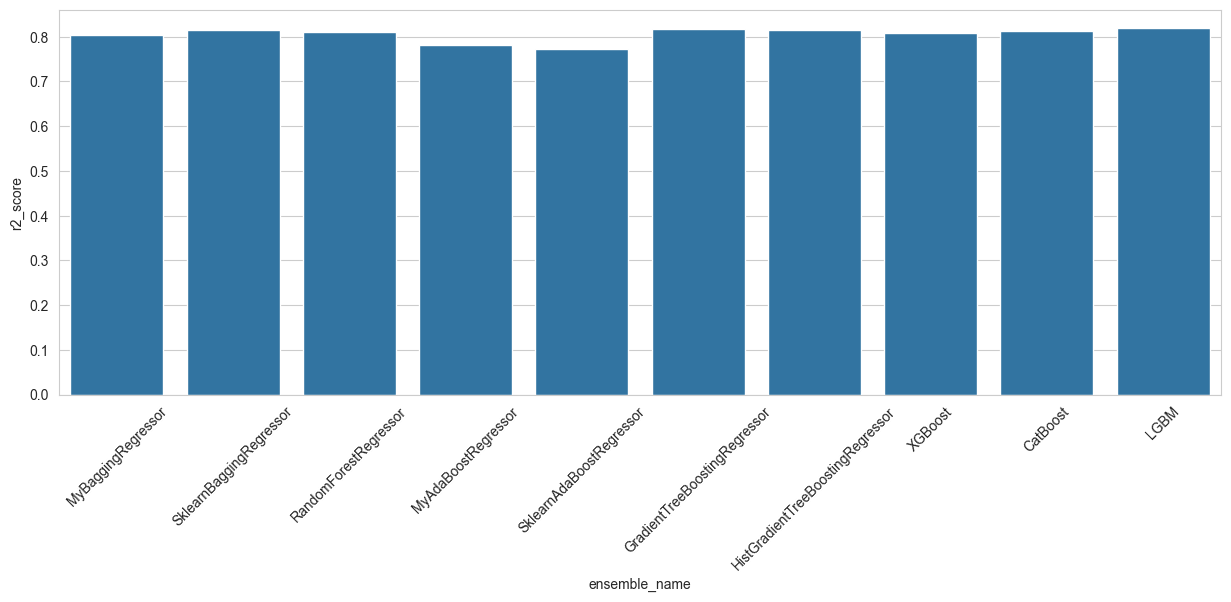

In [105]:
sns.barplot(df, x="ensemble_name", y="r2_score")
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.xticks(rotation=45)
plt.show()

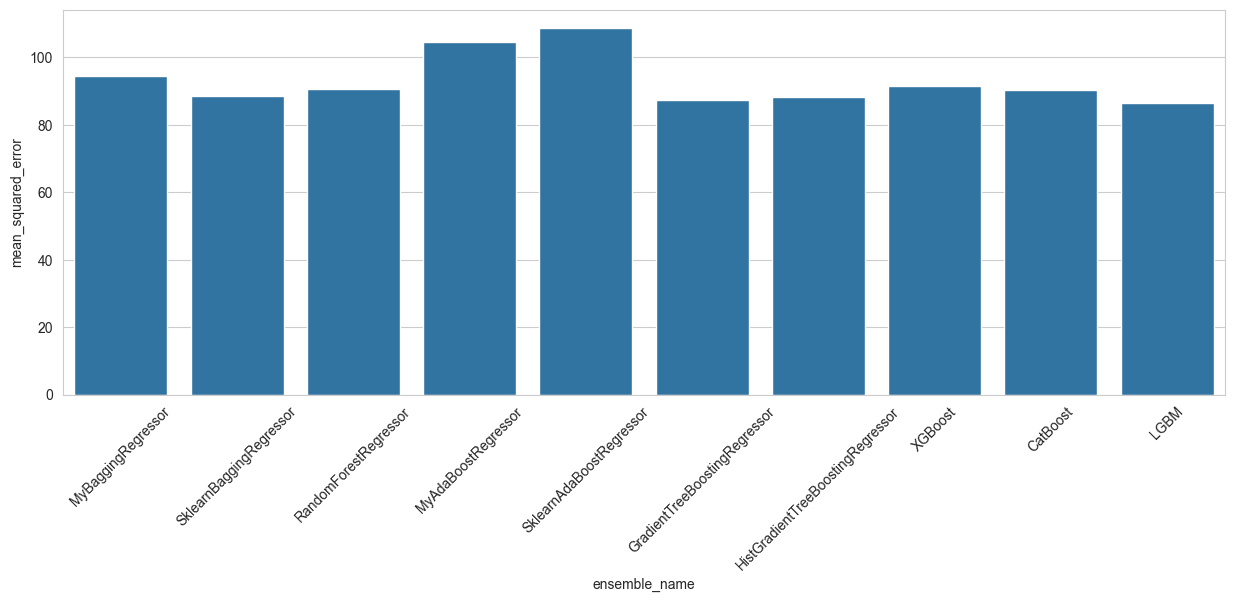

In [106]:
sns.barplot(df, x="ensemble_name", y="mean_squared_error")
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.xticks(rotation=45)
plt.show()

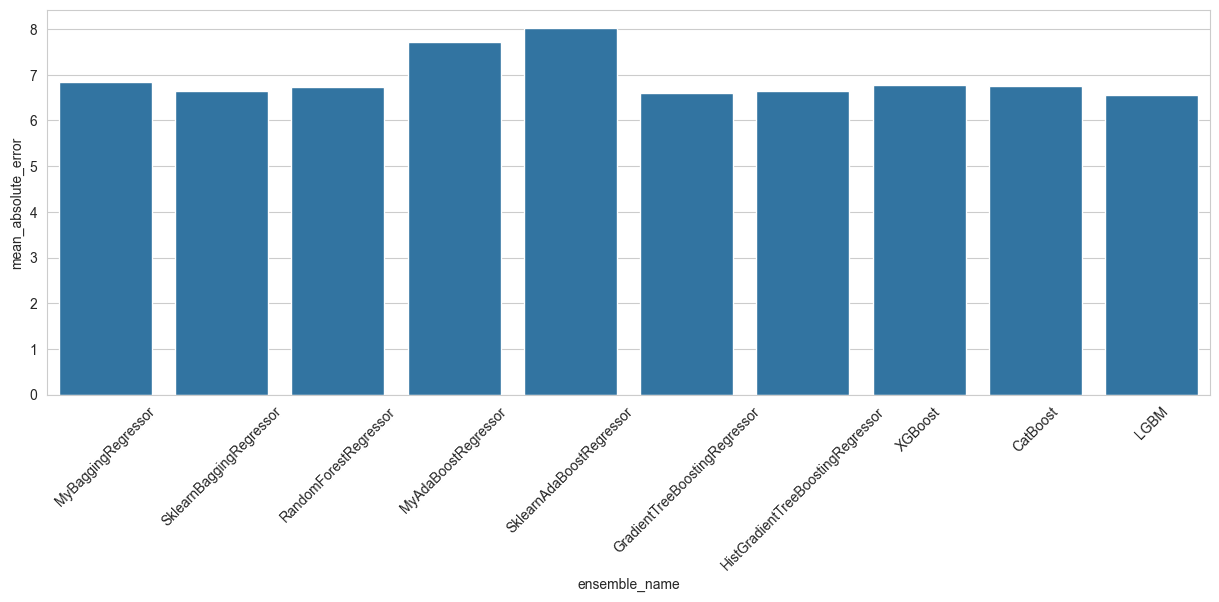

In [107]:
sns.barplot(df, x="ensemble_name", y="mean_absolute_error")
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.xticks(rotation=45)
plt.show()

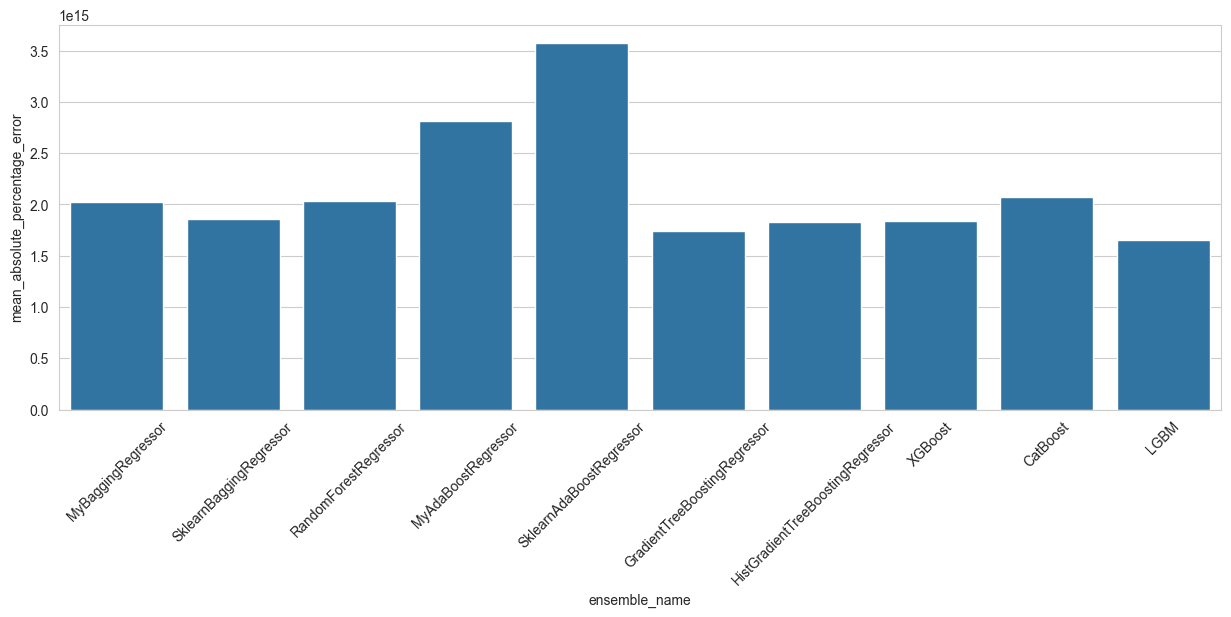

In [108]:
sns.barplot(df, x="ensemble_name", y="mean_absolute_percentage_error")
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.xticks(rotation=45)
plt.show()

So as we can see the best model is LGBM. This model have such params and score:

In [109]:
print('LDBM params', lgbm_best_model.get_params())
print('best score\n', df.iloc[9])

LDBM params {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 13, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 232, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'lambda_l1': 0.9249073509626727, 'lambda_l2': 4.423782356749875e-06, 'feature_fraction': 0.8757736451369132, 'bagging_fraction': 0.9823557654350228, 'bagging_freq': 6}
best score
 ensemble_name                                       LGBM
r2_score                                        0.819398
mean_squared_error                             86.421042
mean_absolute_error                             6.568307
mean_absolute_percentage_error       1653133214370269.75
training_time                     0 days 00:00:00.795127
Name: 0, dtype: object
